In [1]:
import  matplotlib.pyplot as plt
import numpy as np
from scipy.fft import fft, fftfreq
import os
import shutil
import scipy as sp
import scipy.constants as sc
import sys
from matplotlib import gridspec
from matplotlib import rc
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.colors import SymLogNorm
from matplotlib.colors import LogNorm

from mpl_toolkits.mplot3d import Axes3D
import plotly.graph_objs as go

from openpmd_viewer import OpenPMDTimeSeries
from openpmd_viewer.addons import LpaDiagnostics

FontSize=25
FontSizeLabelAxis=25
rc('legend',fontsize=FontSize)
rc('xtick',labelsize=FontSize)
rc('ytick',labelsize=FontSize)
font = {'family' : 'normal',
        'size'   : FontSize}

rc('font', **font)
rc('text', usetex=True)

# scaling factors
mm=1e3
MV=1e-6
kV=1e-3
mu0 = sp.constants.mu_0

cms = sp.constants.speed_of_light

time = 3.36678*10**-11
zloc = time*cms
print(zloc)

0.010093352517452399


In [2]:
base = '/lstr/sahara/aard/cphillips/'

#direc = '1nC/1beam/3warpx/erika/25803_erika_quicklambda/'
#direc = '1nC/1beam/3warpx/erika/28084_erika_longlambda/'

direc = '1nC/1beam/3warpx/circ/31609_cutofftest/' # 45 angle
#direc = '1nC/1beam/3warpx/circ/32118_cond42/'
#direc = '1nC/1beam/3warpx/circ/32119_cond48/'


direc = '1nC/1beam/3warpx/circ/32301_cond45/' # 45 angle
#direc = '1nC/1beam/3warpx/circ/32118_cond42/'
#direc = '1nC/1beam/3warpx/circ/32119_cond48/'
#direc = '1nC/1beam/3warpx/circ/32693_cond30/'
#direc = '1nC/1beam/3warpx/circ/32823_cond62/'
#direc = '1nC/1beam/3warpx/circ/32901_cond90/'

#direc = '1nC/1beam/3warpx/circ/32823_cond62/'
# 80 mm long
#direc = '1nC/1beam/3warpx/circ/33220_cond45/'
#direc = '1nC/1beam/3warpx/circ/33221_cond50/'
#direc = '1nC/1beam/3warpx/circ/33222_cond40/'
#direc = '1nC/1beam/3warpx/circ/33941_cond60/'

#direc = '1nC/1beam/3warpx/circ/32692_cond60/'
#direc = '1nC/1beam/3warpx/circ/32823_cond62/'
#direc = '1nC/1beam/3warpx/circ/32901_cond90/'
#direc = '1nC/1beam/3warpx/circ/34127_cond80/'
#direc = '1nC/1beam/3warpx/circ/34215_cond70/'


# 20 degree cut
#direc = '1nC/1beam/3warpx/circ/37790_cond20len8/' 
direc = '1nC/1beam/3warpx/circ/37719_cond20len10/'


# 25 degree cut
direc = '1nC/1beam/3warpx/circ/37792_cond25len10/' 


# 30 degree cut
#direc = '1nC/1beam/3warpx/circ/37791_cond30len8/' 
#direc = '1nC/1beam/3warpx/circ/37718_cond30len10/'


# 35 degree cut
#direc = '1nC/1beam/3warpx/circ/34634_cond35len8/'
#direc = '1nC/1beam/3warpx/circ/34273_cond35len9/'
#direc = '1nC/1beam/3warpx/circ/34216_cond35/'

# 37 degree cut
#direc = '1nC/1beam/3warpx/circ/35161_cond37len8/' 
#direc = '1nC/1beam/3warpx/circ/35160_cond37len9/' 
#direc = '1nC/1beam/3warpx/circ/34644_cond37len10/'

# 37.5 degree cut
#direc = '1nC/1beam/3warpx/circ/34633_cond37p5len8/'
#direc = '1nC/1beam/3warpx/circ/34272_cond37p5len9/'
#direc = '1nC/1beam/3warpx/circ/34271_cond37p5len10/'

#direc = '1nC/1beam/3warpx/erika/32452_cond45_longer/' # 45 angle
#direc = '1nC/1beam/3warpx/erika/32295_cond42_longer/'
#direc = '1nC/1beam/3warpx/erika/32300_cond48_longer/'
#direc = '1nC/1beam/3warpx/erika/32899_cond30/'
#direc = '1nC/1beam/3warpx/erika/32900_cond62/'
#direc = '1nC/1beam/3warpx/circ/32692_cond60/'
#direc = '1nC/1beam/3warpx/circ/34643_cond90len10/'



dangle = 25

txtfile = base+direc+'diags/reducedfiles/reduced_diags.txt'

filedir = '/lstr/sahara/aard/cphillips/'+direc+'diags/slabmovingwarpx/'



In [3]:
exitprobefile = base+direc+'diags/reducedfiles/exitprobe.txt'
circprobes = [base+direc+'diags/reducedfiles/probe'+str(i)+'.txt' for i in np.arange(1,22)]
#circprobes.insert(0,base+direc+'diags/reducedfiles/exitprobe.txt')
print(circprobes)

['/lstr/sahara/aard/cphillips/1nC/1beam/3warpx/circ/37792_cond25len10/diags/reducedfiles/probe1.txt', '/lstr/sahara/aard/cphillips/1nC/1beam/3warpx/circ/37792_cond25len10/diags/reducedfiles/probe2.txt', '/lstr/sahara/aard/cphillips/1nC/1beam/3warpx/circ/37792_cond25len10/diags/reducedfiles/probe3.txt', '/lstr/sahara/aard/cphillips/1nC/1beam/3warpx/circ/37792_cond25len10/diags/reducedfiles/probe4.txt', '/lstr/sahara/aard/cphillips/1nC/1beam/3warpx/circ/37792_cond25len10/diags/reducedfiles/probe5.txt', '/lstr/sahara/aard/cphillips/1nC/1beam/3warpx/circ/37792_cond25len10/diags/reducedfiles/probe6.txt', '/lstr/sahara/aard/cphillips/1nC/1beam/3warpx/circ/37792_cond25len10/diags/reducedfiles/probe7.txt', '/lstr/sahara/aard/cphillips/1nC/1beam/3warpx/circ/37792_cond25len10/diags/reducedfiles/probe8.txt', '/lstr/sahara/aard/cphillips/1nC/1beam/3warpx/circ/37792_cond25len10/diags/reducedfiles/probe9.txt', '/lstr/sahara/aard/cphillips/1nC/1beam/3warpx/circ/37792_cond25len10/diags/reducedfiles/pr

In [4]:
# Get exit probe location
f = open(exitprobefile)
dat = f.read().split("\n")
header = dat[0]
#        print('Available info in reduced diagnostics: ',header)
ar = []
[ar.append(list(map(lambda x: float(x), row.split(" ")))) for row in dat[1:-1]]
ar = np.array(ar)

yzero = ar[0,3]*mm
zzero = ar[0,4]*mm


In [5]:
structure_len = 9.e-2
struct_start = 0.0

wall_depth = 0.2e-3 # 0.4e-3 for square; 0.2e-3 for circle
cond_depthy = 1.435e-3 # 1.203e-3 for square; 1.435e-3
cond_depth = 500e-9
half_vac_gap_y = (2e-3)/2
cond_too_y = half_vac_gap_y+wall_depth+cond_depthy

# calculate where the 21 probes are
radius = 7.5e-3
arad = dangle*np.pi/180
cond_diff = (cond_depthy - 500e-9) # for future, no /np.tan(arad)
extra = cond_diff/np.tan(arad)

print(np.tan(arad))

numpnts = 21 # number in WarpX
deg_diff = 180/(numpnts-1)
y_start = 0
z_start = (structure_len+struct_start+extra-cond_too_y) #/np.tan(arad)) # for future, needs '+extra'
end_ang = arad-np.pi

#print(full_height)
ylocs = []
zlocs = []
for i in np.arange(numpnts-1):
    yloc = radius*np.sin(end_ang + (i)*deg_diff*np.pi/180)+y_start
    zloc = radius*np.cos(end_ang + (i)*deg_diff*np.pi/180)+z_start
    ylocs.append(yloc)
    zlocs.append(zloc)
ylocs = [i*mm for i in ylocs]
zlocs = [i*mm for i in zlocs]
dangles = [end_ang*180/np.pi + i*deg_diff for i in np.arange(len(ylocs))]

print(dangles)
print(ylocs)
print(zlocs)
print(len(zlocs))

0.4663076581549986
[-155.0, -146.0, -137.0, -128.0, -119.0, -110.0, -101.0, -92.0, -83.0, -74.0, -65.0, -56.0, -47.0, -38.0, -29.0, -20.0, -11.0, -2.0, 7.0, 16.0]
[-3.1696369630552463, -4.193946776030601, -5.114987700468739, -5.910080652050415, -6.559647803545469, -7.047694655894313, -7.36220387585748, -7.495431202643218, -7.444096137309915, -7.209462719537392, -6.797308402774874, -6.217781794162812, -5.485152762143778, -4.617461064942437, -3.636072151847528, -2.5651510749425155, -1.4310674653240865, -0.2617462252687576, 0.9140200755386056, 2.0672801686274935]
[83.64398677469609, 84.22351338330814, 84.9561424153272, 85.82383411252853, 86.80522302562343, 87.87614410252844, 89.01022771214687, 90.17954895220221, 91.35531525300956, 92.50857534609845, 93.61093214052622, 94.63524195350156, 95.5562828779397, 96.35137582952137, 97.00094298101642, 97.48898983336528, 97.80349905332844, 97.93672638011418, 97.88539131478088, 97.65075789700835]
20


In [6]:
# Load all of the data
# get the start index from the z rms locations
f = open(txtfile)
dat = f.read().split("\n")
ar = []
[ar.append(list(map(lambda x: float(x), row.split(" ")))) for row in dat[1:-1]]
ar = np.array(ar)

time = ar[:,1]
zmean = ar[:,4]
zrms = ar[:,11]

zstructure = time*cms
zstructure = zstructure-structure_len-struct_start
lastpart = [zmean[i]-zrms[i] for i in np.arange(len(zmean))]
for i in np.arange(len(lastpart)):
    if lastpart[i]*mm > np.min(zlocs): # (structure_len+struct_start-cond_too_y/np.tan(arad)):
        indlast = i
        break
    else:
        indlast = -1
t_particles_end = time[indlast]
print(lastpart)
print(np.max(zlocs))
print('"last" is at z= ',t_particles_end*cms*mm,' mm')

# get the min index
time = []

f = open(circprobes[0])
dat = f.read().split("\n")
header = dat[0]
#        print('Available info in reduced diagnostics: ',header)
ar = []
[ar.append(list(map(lambda x: float(x), row.split(" ")))) for row in dat[1:-1]]
ar = np.array(ar)

#    time.append(ar[:,1]*1e12) # ps
#print(ar[:,1])
time.append(ar[:,1])
#print(time)
for j in np.arange(len(time)):
    if time[0][j] > t_particles_end:
        indlast = j
        break


# get all of the data from the probes on the half circle
rtime = []
ytxt = []
ztxt = []
Extxt = []
Eytxt = []
Eztxt = []
Bxtxt = []
Bytxt = []
Bztxt = []
PVtxt = []
Sx = []
Sy = []
Sz = []
angles = []
Etot = []

indmore = 0
#indlast = 0
try: 
    for i in np.arange(len(circprobes)):
        f = open(circprobes[i])
        dat = f.read().split("\n")
        header = dat[0]
#        print('Available info in reduced diagnostics: ',header)
        ar = []
        [ar.append(list(map(lambda x: float(x), row.split(" ")))) for row in dat[1:-1]]
        ar = np.array(ar)
        indlastz = indlast+indmore
        rtime.append(np.array(ar[indlastz:,1]))
        ytxt.append(ar[indlastz:,3]*mm) # mm
        ztxt.append(ar[indlastz:,4]*mm)
        Extxt.append(ar[indlastz:,5])
        Eytxt.append(ar[indlastz:,6])
        Eztxt.append(ar[indlastz:,7])
        Etot.append(np.sqrt(Extxt[i]**2+Eytxt[i]**2+Eztxt[i]**2))
        Bxtxt.append(ar[indlastz:,8])
        Bytxt.append(ar[indlastz:,9])
        Bztxt.append(ar[indlastz:,10])
        PVtxt.append(np.array(ar[indlastz:,11]))
        angles.append(np.rad2deg(np.arctan2(ytxt[i] - yzero, ztxt[i] - zzero))[0])
except IndexError:
    print('number of files within bounds: ',len(ytxt))
time = [i*1e12 for i in rtime[0]]

print(angles)
print(np.shape(Eztxt))

ytxtlocs = [ytxt[i][0] for i in np.arange(len(ytxt))]
ztxtlocs = [ztxt[i][0] for i in np.arange(len(ztxt))]
print(ytxtlocs)
print(ztxtlocs)
print(np.shape(PVtxt))

for i in np.arange(np.shape(Eztxt)[0]):
    Sx.append((1/mu0)*(Eytxt[i]*Bztxt[i] - Eztxt[i]*Bytxt[i]))
    Sy.append((1/mu0)*(Eztxt[i]*Bxtxt[i] - Extxt[i]*Bztxt[i]))
    Sz.append((1/mu0)*(Extxt[i]*Bytxt[i] - Eytxt[i]*Bxtxt[i]))
print(np.shape(Sx))
print(np.shape(Sy))
print(np.shape(Sz))

[-0.010984395146807917, -0.0031460170735209793, 0.004692362378975, 0.01253074187924286, 0.020369121416851873, 0.028207500991867137, 0.03604588060417757, 0.04388426025367787, 0.051722639940263354, 0.05956101966383023, 0.06739939942427514, 0.07523777922149527, 0.08307615905538822, 0.09091453892585166, 0.09875291882228558, 0.10659129863985148, 0.11442967837550709, 0.12226805808326287, 0.13010643777686368, 0.13794481746122556, 0.1457831971388816, 0.15362157681138333, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
97.93672638011418
"last" is at z=  101.90425781249917  mm
[-166.14554697992617, -161.1324389799656, -156.09435331390387, -151.02230545573676, -145.90525788275892, -140.7291824798823, -135.47566162195534, -130.1197168609533, -124.62629899684515, -118.94435582250274, -112.9962814452754, -106.65799061068971, -99.71847579131405, -91.79023618054

(21, 5896)


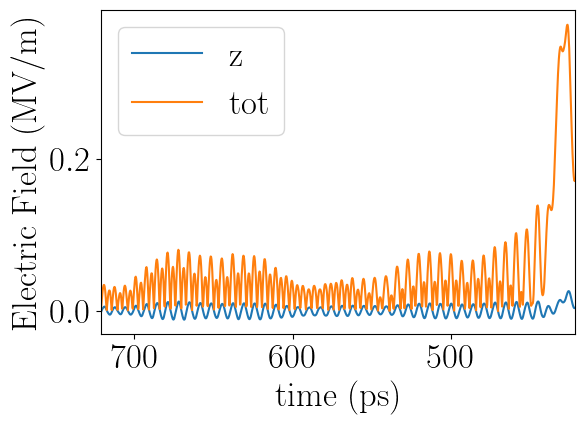

copper skin depth:  104.9277700339428  nm
max freq  3289230.1250610175  located at  136.9462344001963  GHz
time average of PV (aka average power):  12049060.69024607
(21, 5896)


/tmp/ipykernel_2535527/639305154.py:100: DeprecationWarning: You are passing x=[4.21757333e-10 4.22018807e-10 4.22280281e-10 ... 7.20621953e-10
 7.20883427e-10 7.21144901e-10] as a positional argument. Please change your invocation to use keyword arguments. From SciPy 1.14, passing these as positional arguments will result in an error.
  intsimps = sp.integrate.simpson(PVtxt[indrun][mintime:maxtime],rtime[indrun][mintime:maxtime])


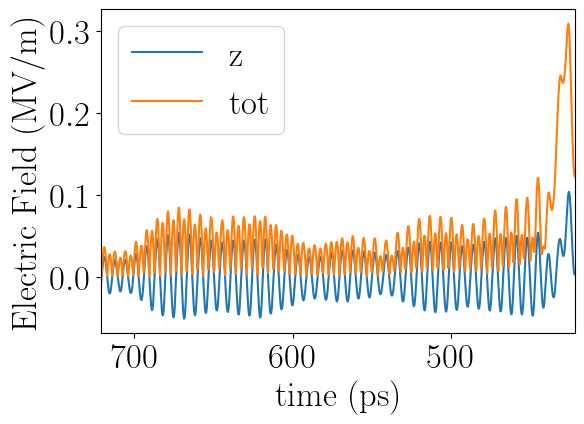

copper skin depth:  104.9277700339428  nm
max freq  14757182.594578316  located at  136.9462344001963  GHz
time average of PV (aka average power):  9199219.529687868
(21, 5896)


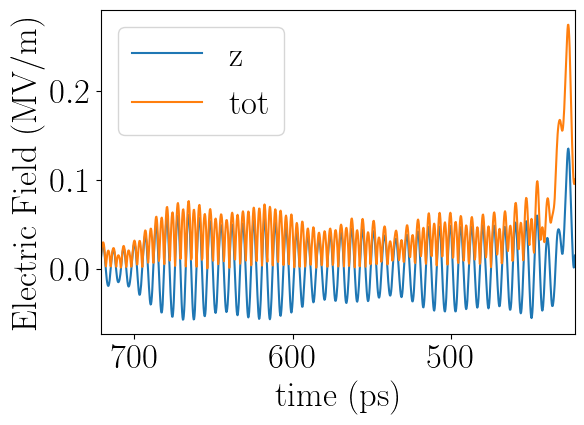

copper skin depth:  104.9277700339428  nm
max freq  17971731.148177482  located at  136.9462344001963  GHz
time average of PV (aka average power):  6872222.499022347
(21, 5896)


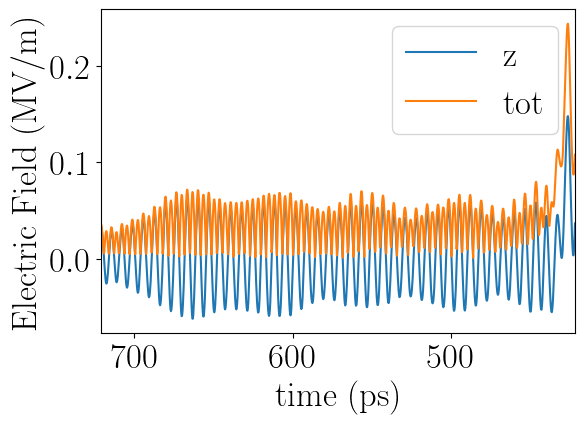

copper skin depth:  104.9277700339428  nm
max freq  20682068.80743534  located at  136.9462344001963  GHz
time average of PV (aka average power):  6080967.004146957
(21, 5896)


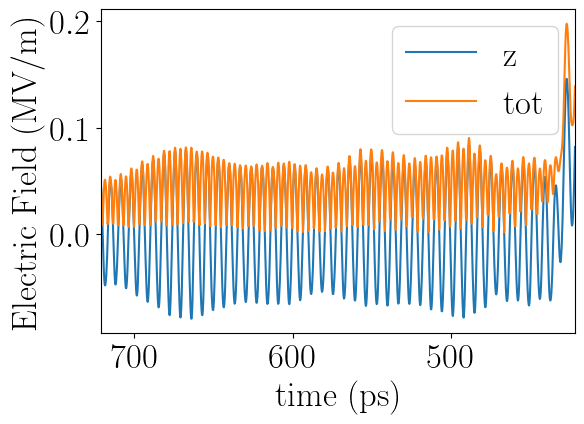

copper skin depth:  104.9277700339428  nm
max freq  27831011.985717863  located at  136.9462344001963  GHz
time average of PV (aka average power):  7545004.328886825
(21, 5896)


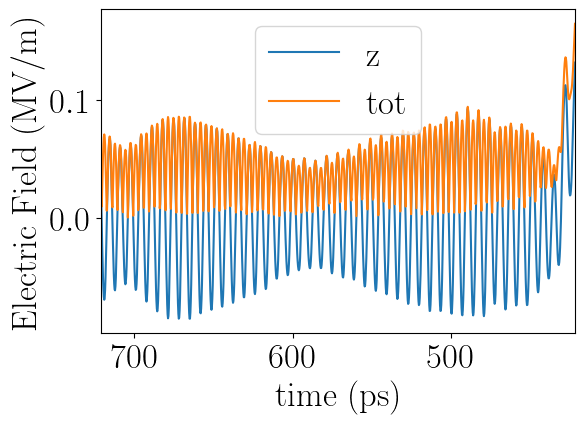

copper skin depth:  104.9277700339428  nm
max freq  28120373.24313911  located at  136.9462344001963  GHz
time average of PV (aka average power):  7278055.845208624
(21, 5896)


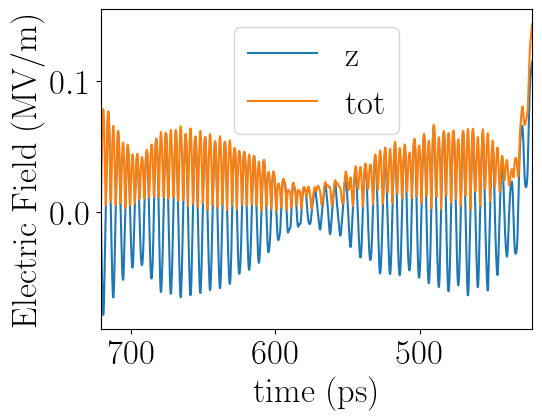

copper skin depth:  104.9277700339428  nm
max freq  18699808.732365828  located at  136.9462344001963  GHz
time average of PV (aka average power):  3782850.47634393
(21, 5896)


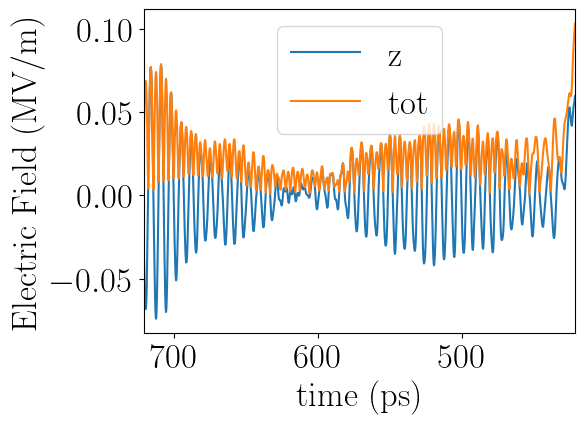

copper skin depth:  104.9277700339428  nm
max freq  11745248.547666201  located at  136.9462344001963  GHz
time average of PV (aka average power):  1749425.5782375082
(21, 5896)


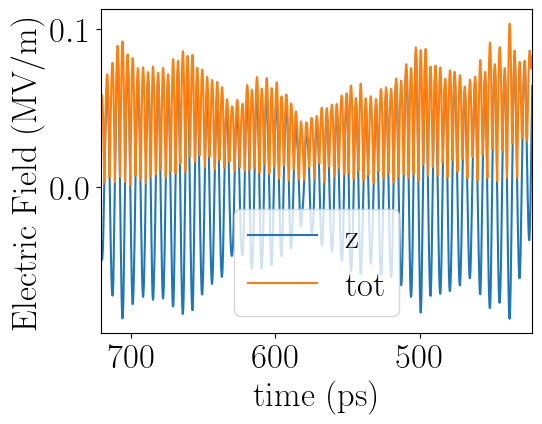

copper skin depth:  104.9277700339428  nm
max freq  21459745.15537231  located at  136.9462344001963  GHz
time average of PV (aka average power):  6589984.993895746
(21, 5896)


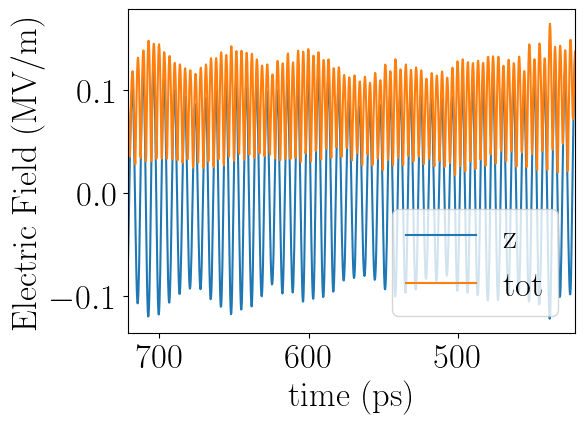

copper skin depth:  104.9277700339428  nm
max freq  38139875.72600945  located at  136.9462344001963  GHz
time average of PV (aka average power):  20795879.561277423
(21, 5896)


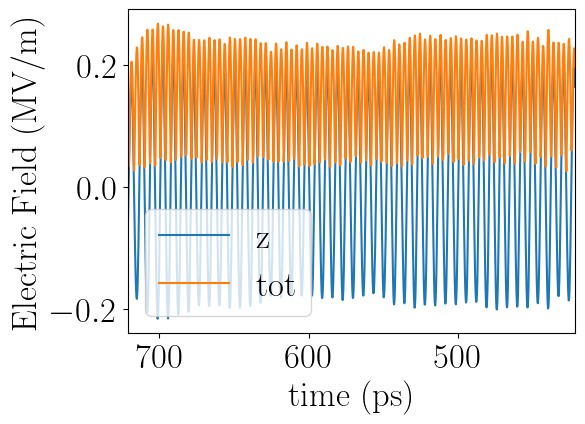

copper skin depth:  104.9277700339428  nm
max freq  76246185.42115699  located at  136.9462344001963  GHz
time average of PV (aka average power):  76817533.17086956
(21, 5896)


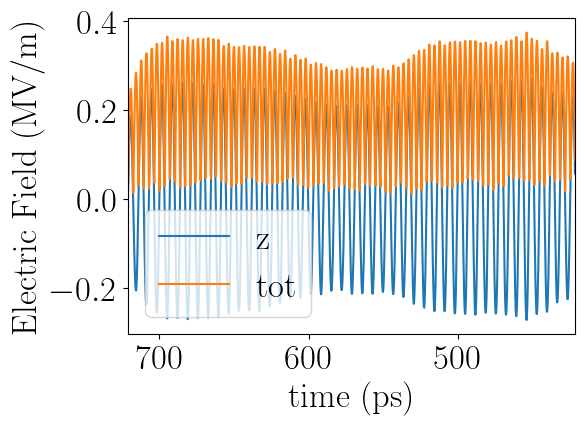

copper skin depth:  104.9277700339428  nm
max freq  94918883.56826627  located at  136.9462344001963  GHz
time average of PV (aka average power):  147287234.0748365
(21, 5896)


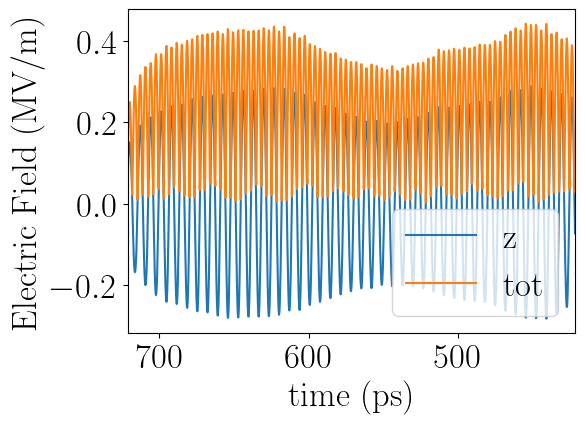

copper skin depth:  104.9277700339428  nm
max freq  96572001.35952552  located at  136.9462344001963  GHz
time average of PV (aka average power):  201790765.6991178
(21, 5896)


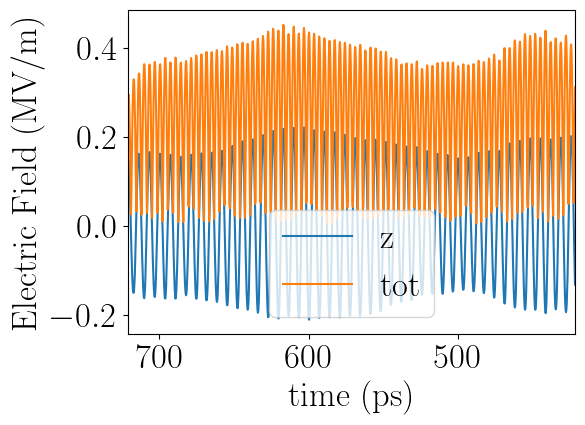

copper skin depth:  104.9277700339428  nm
max freq  72748757.01401375  located at  136.9462344001963  GHz
time average of PV (aka average power):  203308013.25721154
(21, 5896)


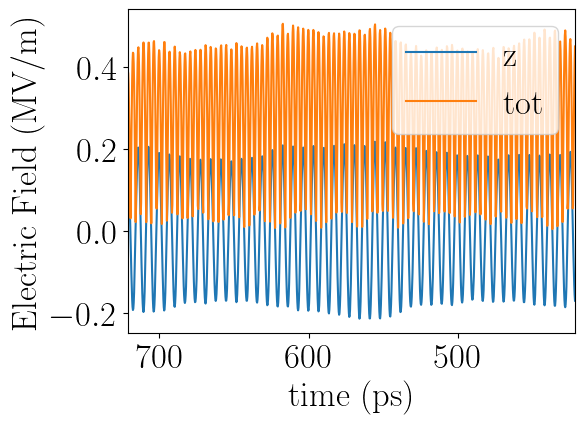

copper skin depth:  104.9277700339428  nm
max freq  76875117.96412975  located at  136.9462344001963  GHz
time average of PV (aka average power):  281997757.1396293
(21, 5896)


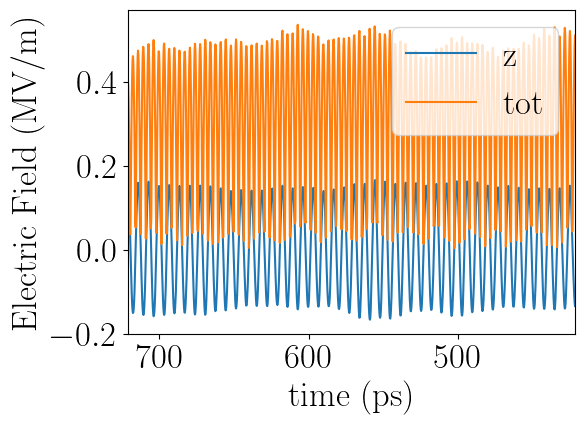

copper skin depth:  104.9277700339428  nm
max freq  60524400.33094754  located at  136.9462344001963  GHz
time average of PV (aka average power):  321315449.11691386
(21, 5896)


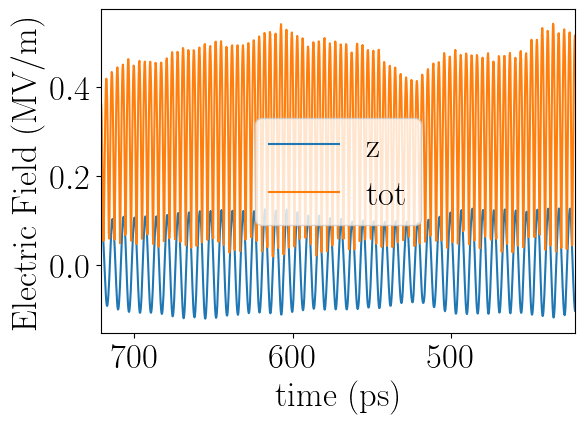

copper skin depth:  104.9277700339428  nm
max freq  44194355.90935102  located at  136.9462344001963  GHz
time average of PV (aka average power):  311407143.05272037
(21, 5896)


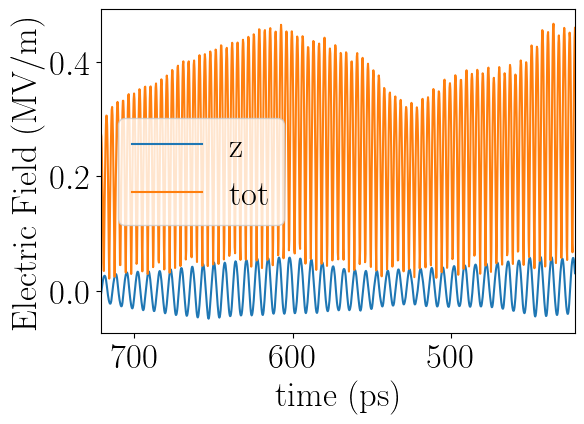

copper skin depth:  104.9277700339428  nm
max freq  16032335.13194326  located at  136.9462344001963  GHz
time average of PV (aka average power):  199059458.3560104
(21, 5896)


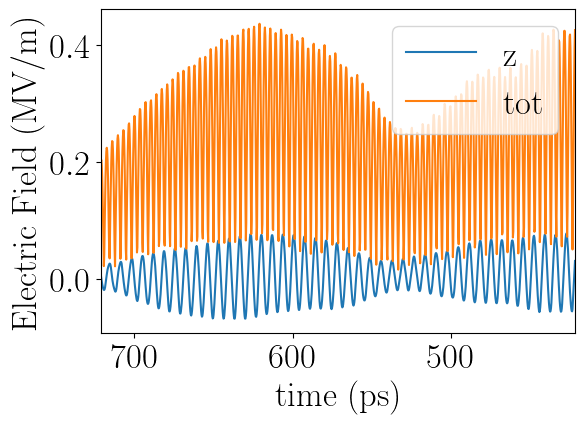

copper skin depth:  104.9277700339428  nm
max freq  20333528.388631918  located at  136.9462344001963  GHz
time average of PV (aka average power):  167816825.10375944
(21, 5896)


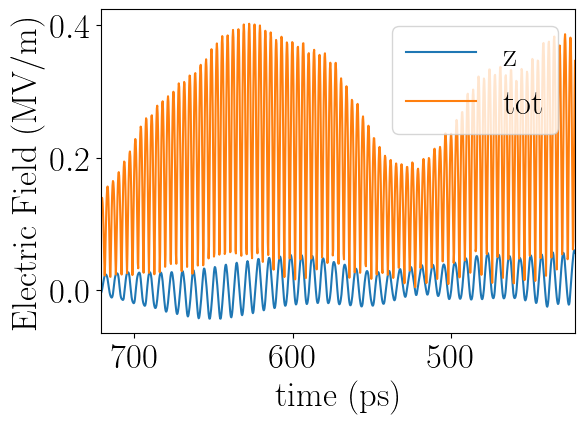

copper skin depth:  104.9277700339428  nm
max freq  12616070.049186198  located at  136.9462344001963  GHz
time average of PV (aka average power):  137435547.0524088
(21, 5896)


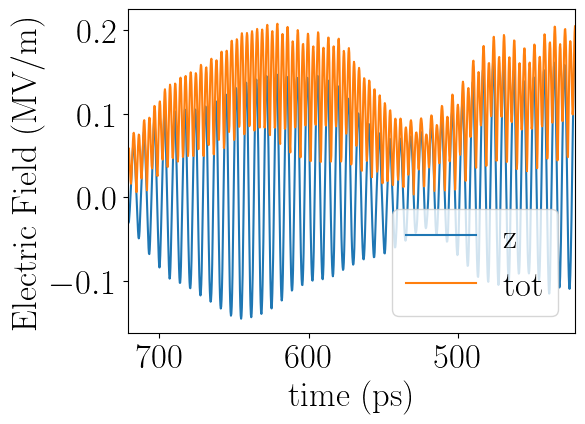

copper skin depth:  104.9277700339428  nm
max freq  41541646.93955354  located at  136.9462344001963  GHz
time average of PV (aka average power):  34700403.55861475
[-175.63842765433412, -153.99192274787836, -139.872430190575, -129.65105793467973, -113.12193892745306, -101.47476919773224, -101.85126310993398, -101.86121800876874, -64.05378182752008, -51.72288993259973, -53.374166472507866, -46.42997866275981, -39.36532735874739, -27.35618365922968, -24.190283249056638, -17.42846548051959, -12.501777364856194, 2.3720446866562233, 2.3607321864533235, 3.487824872747499, 41.25962150418785] [11974681.92572416, 8789696.7482284, 6429268.815690501, 5738114.816243262, 7173963.708349719, 6950414.272369821, 3565674.5534088765, 1576282.6616030927, 6440901.127741358, 20227009.63486833, 75906246.18054101, 146804851.72133604, 201673933.99426416, 203106275.3454305, 281796747.57115674, 321109089.2332135, 310511282.20635784, 198209652.87994796, 166163305.7709752, 136726367.08124477, 32355112.459362634]


In [15]:
# let's plot first to get the maximum time
mintime = 1300
maxtime = -1

mintime = 1600
maxtime = -3150

#mintime = 0
#maxtime = -1


# 1350; 2250

lowfreq = 4
hihfreq = 100

Fxs = []
Fys = []
maxfreqs = []
Ezind = []

Fxstot = []
Fystot = []
maxfreqstot = []
Etotind = []

pvavg = []
pvtott = []
pvtots = []
Sxavg = []
Syavg = []
Szavg = []

#print(time)
for indrun in np.arange(len(Eztxt)):
#print(len(Eztxt[indrun]))

    print(np.shape(Eztxt))
    #time = time[0]
    plt.plot(time[mintime:maxtime],Eztxt[indrun][mintime:maxtime]*MV,label='z')
    plt.plot(time[mintime:maxtime],Etot[indrun][mintime:maxtime]*MV,label='tot')
#    plt.plot(time[mintime:maxtime],PVtxt[indrun][mintime:maxtime]*MV,label='PV')
    plt.xlabel('time (ps)')
    plt.ylabel('Electric Field (MV/m)')
    plt.legend()
    plt.xlim([max(time[mintime:maxtime]),min(time[mintime:maxtime])])
    plt.tight_layout()
    plt.show()
    
    # Try FFT on a single one
    aEzslice = Eztxt[indrun][mintime:maxtime]
    zint = [i/1e12 for i in time[mintime:maxtime]]
    aEzslicelen = len(aEzslice)
    #print(aEzslicelen/2)
    samplerate = aEzslicelen/(zint[-1] - zint[0])
    
    Fy = fft(aEzslice)
    Fx = fftfreq(aEzslicelen,1/samplerate)
    
    freqmax = np.amax(np.abs(Fy[lowfreq:hihfreq]))
    indexfreq = np.where(np.abs(Fy[lowfreq:hihfreq])==freqmax)
    flatind = [41] #indexfreq[0]  # --------------------------------------------------------
    Ezind.append(flatind)
    wavelength = cms/np.abs(Fx[flatind[0]])
    wavem = wavelength
    freqs = wavem/cms
    freq = 1/freqs
    skindepth_cu = 1/np.sqrt(sc.pi*sc.mu_0*freq*1.68e8)
    print('copper skin depth: ',skindepth_cu*1e9,' nm')
    
    print('max freq ',freqmax,' located at ',Fx[flatind[0]]/1e9,' GHz')
    Fxs.append(Fx[:len(Fx)//2])
    Fys.append(Fy[:len(Fx)//2])
    maxfreqs.append(Fx[flatind[0]]/1e9)
    
    aEzslicet = Etot[indrun][mintime:maxtime]
    zintt = [i/1e12 for i in time[mintime:maxtime]]
    aEzslicelent = len(aEzslicet)
    sampleratet = aEzslicelent/(zintt[-1] - zintt[0])

    Fyt = fft(aEzslicet)
    Fxt = fftfreq(aEzslicelent,1/sampleratet)

    freqmaxt = np.amax(np.abs(Fyt[lowfreq:hihfreq]))
    indexfreqt = np.where(np.abs(Fyt[lowfreq:hihfreq])==freqmaxt)
    flatindt = [86] #indexfreqt[0]    #-----------------------------------------------------------
    Etotind.append(flatindt)
    wavelengtht = cms/np.abs(Fxt[flatindt[0]])
    wavemt = wavelengtht
    freqst = wavemt/cms
    freq = 1/freqst
    Fxstot.append(Fxt[:len(Fxt)//2])
    Fystot.append(Fyt[:len(Fxt)//2])
    maxfreqstot.append(Fxt[flatindt[0]]/1e9)
    
    # ------------------------------------------------------
    # get PV recorded magnitude integrated over the specific range; gets pv average, trapezoid rule integrate PV, and simpson's rule PV
    pvavg.append(np.average(PVtxt[indrun][mintime:maxtime]))
    inttrapz = np.trapz(PVtxt[indrun][mintime:maxtime],rtime[indrun][mintime:maxtime])
    intsimps = sp.integrate.simpson(PVtxt[indrun][mintime:maxtime],rtime[indrun][mintime:maxtime])
    pvtott.append(inttrapz)
    pvtots.append(intsimps)
    
    print('time average of PV (aka average power): ',pvavg[indrun])
    
    Sxavg.append(np.average(Sx[indrun][mintime:maxtime]))
    Syavg.append(np.average(Sy[indrun][mintime:maxtime]))
    Szavg.append(np.average(Sz[indrun][mintime:maxtime]))
    

# let's get the angles for the Poynting vectors now
# we already got the time average for the specific range we look at for Ez and Etot
Sangs = []
Smags = []
for i in np.arange(len(Szavg)):
    Sangs.append(np.arctan2(Syavg[i],Szavg[i])*180/np.pi)
    Smags.append(np.sqrt(Szavg[i]**2 + Syavg[i]**2))
print(Sangs,Smags)



In [16]:
print('S vector mags: ',Smags[:5])
print('PV average: ',pvavg[:5])
print('PV integrate trap: ',pvtott[:5])
print('Pv integrate simpsons: ',pvtots[:5])


S vector mags:  [11974681.92572416, 8789696.7482284, 6429268.815690501, 5738114.816243262, 7173963.708349719]
PV average:  [12049060.69024607, 9199219.529687868, 6872222.499022347, 6080967.004146957, 7545004.328886825]
PV integrate trap:  [0.0036024980981333985, 0.002752797849834005, 0.002056465782200251, 0.0018182659937038105, 0.00225389845379852]
Pv integrate simpsons:  [0.003602376108153388, 0.0027526591597322766, 0.002056199221448862, 0.0018180727860201975, 0.0022536040011791004]


wavelength/frequency from: 
Ez =  2.1891252381859596  mm and  136.9462344001963  GHz
Etot =  1.0436527298328415  mm and  287.25307703455803  GHz
skin depth for copper Etot:  104.9277700339428  nm
 
FFT FROM EZ


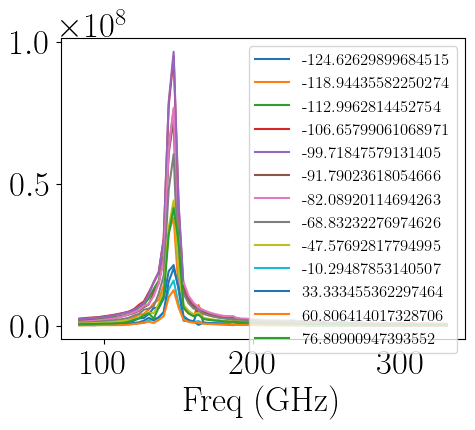

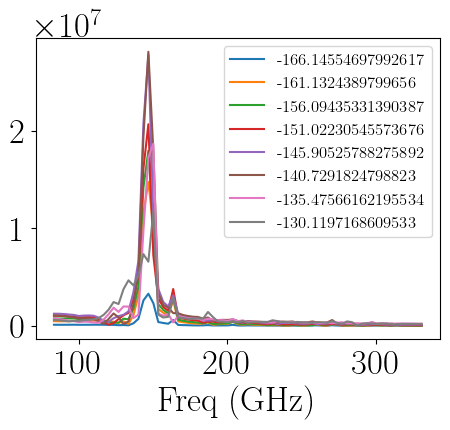

---------------------------------------------------
FFT FROM ETOT


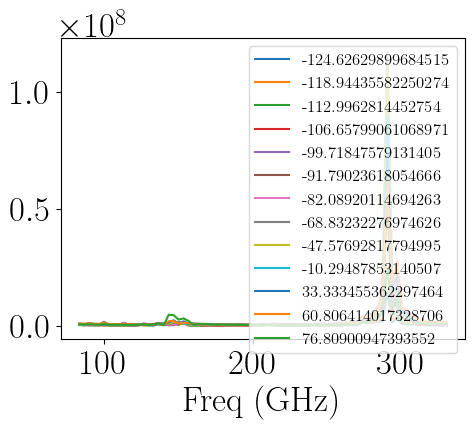

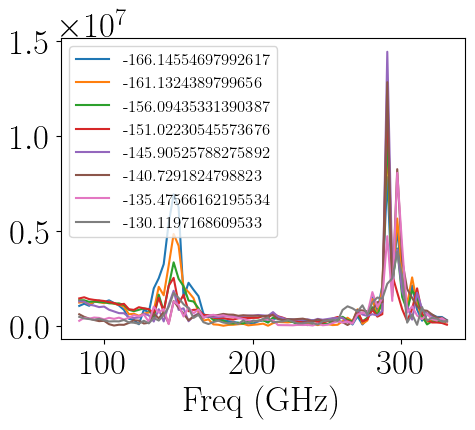

In [17]:
lowfreq = 25
hihfreq = 100
print('wavelength/frequency from: ')
print('Ez = ',wavem*1e3,' mm and ',Fx[flatind[0]]/1e9,' GHz')
print('Etot = ',wavemt*1e3,' mm and ',Fxt[flatindt[0]]/1e9,' GHz')
skindepth_cuE = 1/np.sqrt(sc.pi*sc.mu_0*Fxt[flatindt[0]]/1e9*5.8e7)
#skindepth_cuE = 1/np.sqrt(sc.pi*sc.mu_0*Fxt[flatindt[0]]/1e9*5.8e7)
print('skin depth for copper Etot: ',skindepth_cu*1e9,' nm')
#print('skin depth for copper PVavg: ',skindepth_cu,' nm')
print(' ')
print('FFT FROM EZ')

figfreq = plt.figure(9997)
gs1 = gridspec.GridSpec(11,11)
ax1 = figfreq.add_subplot(gs1[1:10,1:10])
#ax1.text(0,freqmax*3/4,'lambda = '+str(round(wavelength,8)*1e3)+' mm',bbox=dict(facecolor='red',alpha=0.6),fontsize=12)
for i in np.arange(8,len(Extxt)): #len(Extxt)):
    imFreqs = ax1.plot(Fxs[i][lowfreq:hihfreq]/1e9,np.abs(Fys[i][lowfreq:hihfreq]),label=str(angles[i]))
plt.legend(fontsize=12)
#ax1.set_xlim([0,250])
ax1.set_xlabel('Freq (GHz)')
plt.show()

figfreq = plt.figure(9998)
gs1 = gridspec.GridSpec(11,11)
ax1 = figfreq.add_subplot(gs1[1:10,1:10])
#ax1.text(0,freqmax*3/4,'lambda = '+str(round(wavelength,8)*1e3)+' mm',bbox=dict(facecolor='red',alpha=0.6),fontsize=12)
for i in np.arange(0,8): #len(Extxt)):
    imFreqs = ax1.plot(Fxs[i][lowfreq:hihfreq]/1e9,np.abs(Fys[i][lowfreq:hihfreq]),label=str(angles[i]))
plt.legend(fontsize=12)
#ax1.set_xlim([0,250])
ax1.set_xlabel('Freq (GHz)')
plt.show()

print('---------------------------------------------------')
print('FFT FROM ETOT')
figfreq = plt.figure(9997)
gs1 = gridspec.GridSpec(11,11)
ax1 = figfreq.add_subplot(gs1[1:10,1:10])
#ax1.text(0,freqmax*3/4,'lambda = '+str(round(wavelength,8)*1e3)+' mm',bbox=dict(facecolor='red',alpha=0.6),fontsize=12)
for i in np.arange(8,len(Extxt)): #len(Extxt)):
    imFreqs = ax1.plot(Fxstot[i][lowfreq:hihfreq]/1e9,np.abs(Fystot[i][lowfreq:hihfreq]),label=str(angles[i]))
plt.legend(fontsize=12)
#ax1.set_xlim([0,250])
ax1.set_xlabel('Freq (GHz)')
plt.show()

figfreq = plt.figure(9998)
gs1 = gridspec.GridSpec(11,11)
ax1 = figfreq.add_subplot(gs1[1:10,1:10])
#ax1.text(0,freqmax*3/4,'lambda = '+str(round(wavelength,8)*1e3)+' mm',bbox=dict(facecolor='red',alpha=0.6),fontsize=12)
for i in np.arange(0,8): #len(Extxt)):
    imFreqs = ax1.plot(Fxstot[i][lowfreq:hihfreq]/1e9,np.abs(Fystot[i][lowfreq:hihfreq]),label=str(angles[i]))
plt.legend(fontsize=12)
#ax1.set_xlim([0,250])
ax1.set_xlabel('Freq (GHz)')
plt.show()






probe angles:  [-166.14554697992617, -161.1324389799656, -156.09435331390387, -151.02230545573676, -145.90525788275892, -140.7291824798823, -135.47566162195534, -130.1197168609533, -124.62629899684515, -118.94435582250274, -112.9962814452754, -106.65799061068971, -99.71847579131405, -91.79023618054666, -82.08920114694263, -68.83232276974626, -47.57692817794995, -10.29487853140507, 33.333455362297464, 60.806414017328706, 76.80900947393552]
Poynting Vector angles:  [-175.63842765433412, -153.99192274787836, -139.872430190575, -129.65105793467973, -113.12193892745306, -101.47476919773224, -101.85126310993398, -101.86121800876874, -64.05378182752008, -51.72288993259973, -53.374166472507866, -46.42997866275981, -39.36532735874739, -27.35618365922968, -24.190283249056638, -17.42846548051959, -12.501777364856194, 2.3720446866562233, 2.3607321864533235, 3.487824872747499, 41.25962150418785]
Difference:  [-9.492880674407957, 7.140516232087236, 16.221923123328878, 21.37124752105703, 32.783318955

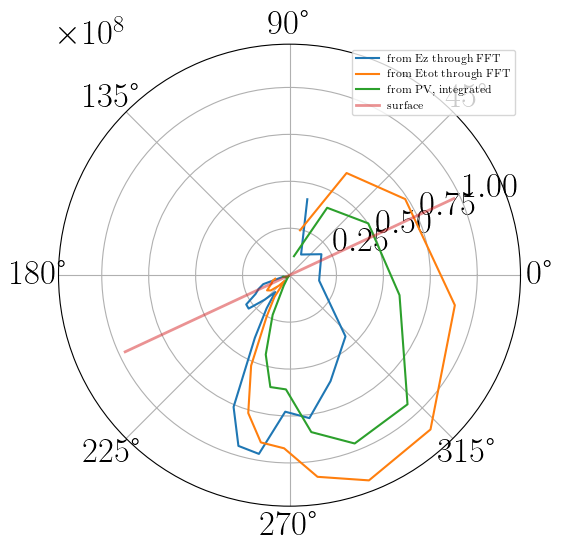

In [18]:
# plot on weird circle
maxs = []
maxstot = []
for i in np.arange(len(Fys)):
    maxs.append(np.max(np.abs(Fys[i][lowfreq:hihfreq])))
    maxstot.append(np.max(np.abs(Fystot[i][lowfreq:hihfreq])))

pvtot = pvtots

pvtotm = [i*1e9 for i in pvtot]
Smagsm = [i*1e-1 for i in Smags]

print('probe angles: ',angles)
print('Poynting Vector angles: ',Sangs)
print('Difference: ',[Sangs[i] - angles[i] for i in np.arange(len(angles))])
print(' ')


print(maxs)
print('integrated: ',pvtot)
print('S mags: ',Smags)
print('magnitude difference: ',[maxstot[i]-Smags[i] for i in np.arange(len(Smags))])
arads = [i*np.pi/180 for i in angles]
fig,ax = plt.subplots(subplot_kw={'projection':'polar'},figsize=(6,6))
ax.plot(arads[:len(Fys)],maxs,label='from Ez through FFT')
ax.plot(arads[:len(Fystot)],maxstot,label='from Etot through FFT')
ax.plot(arads[:len(Fys)],pvtotm,label='from PV, integrated')
#ax.plot(Sangs[:len(Fys)],Smagsm,label='from vector')

ax.plot(np.array([dangle+180,dangle])*np.pi/180,[np.max(maxs),np.max(maxs)],linewidth=2,alpha=0.5,linestyle='-',label='surface') # orange line
ax.legend(fontsize=8)
ax.grid(True)
plt.show()


In [19]:
print(Sangs,Smags)
#Smags = [i*1e-1 for i in Smags]

[-175.63842765433412, -153.99192274787836, -139.872430190575, -129.65105793467973, -113.12193892745306, -101.47476919773224, -101.85126310993398, -101.86121800876874, -64.05378182752008, -51.72288993259973, -53.374166472507866, -46.42997866275981, -39.36532735874739, -27.35618365922968, -24.190283249056638, -17.42846548051959, -12.501777364856194, 2.3720446866562233, 2.3607321864533235, 3.487824872747499, 41.25962150418785] [11974681.92572416, 8789696.7482284, 6429268.815690501, 5738114.816243262, 7173963.708349719, 6950414.272369821, 3565674.5534088765, 1576282.6616030927, 6440901.127741358, 20227009.63486833, 75906246.18054101, 146804851.72133604, 201673933.99426416, 203106275.3454305, 281796747.57115674, 321109089.2332135, 310511282.20635784, 198209652.87994796, 166163305.7709752, 136726367.08124477, 32355112.459362634]


S vector mags:  [11974681.92572416, 8789696.7482284, 6429268.815690501, 5738114.816243262, 7173963.708349719]
PV average:  [12049060.69024607, 9199219.529687868, 6872222.499022347, 6080967.004146957, 7545004.328886825]
PV integrate trap:  [0.0036024980981333985, 0.002752797849834005, 0.002056465782200251, 0.0018182659937038105, 0.00225389845379852]
Pv integrate simpsons:  [0.003602376108153388, 0.0027526591597322766, 0.002056199221448862, 0.0018180727860201975, 0.0022536040011791004]


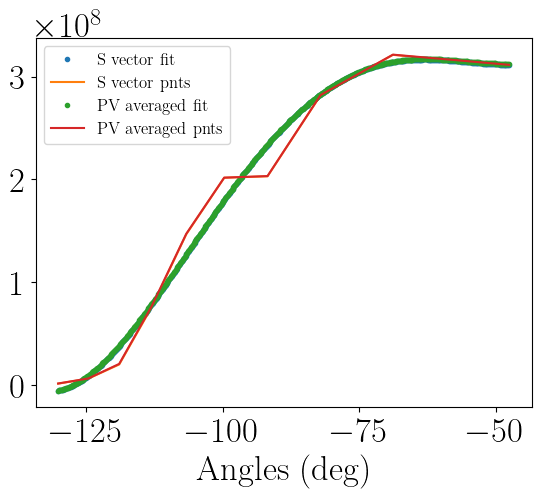

indexed max:  316603164.9171119
S magnitude angle:  62.960654325283244  degrees
indexed max:  317011808.9930954
PV averaged angle:  62.62982150491048  degrees


IndexError: index 1 is out of bounds for axis 0 with size 1

In [20]:
# POYNTING VECTOR ONLY COMPARISON
print('S vector mags: ',Smags[:5])
print('PV average: ',pvavg[:5])
print('PV integrate trap: ',pvtott[:5])
print('Pv integrate simpsons: ',pvtots[:5])

# Let's get the actual angle
minSmag = 7
maxSmag = len(pvavg)-4
minPVavg = 7
maxPVavg = len(pvavg)-4

adegSmag = [i*180/np.pi for i in arads]
adegPVavg = [i*180/np.pi for i in arads]

poly4Smag = np.polyfit(adegSmag[minSmag:maxSmag],Smags[minSmag:maxSmag],4)
poly4PVavg = np.polyfit(adegPVavg[minPVavg:maxPVavg],pvavg[minPVavg:maxPVavg],4)

xSmag = np.linspace(min(adegSmag[minSmag:maxSmag]),max(adegSmag[minSmag:maxSmag]),500)
xPVavg = np.linspace(min(adegPVavg[minPVavg:maxPVavg]),max(adegPVavg[minPVavg:maxPVavg]),500)

plt.plot(xSmag,np.polyval(poly4Smag,xSmag),'.',label='S vector fit')
plt.plot(adegSmag[minSmag:maxSmag],Smags[minSmag:maxSmag],label='S vector pnts')
plt.plot(xPVavg,np.polyval(poly4PVavg,xPVavg),'.',label='PV averaged fit')
plt.plot(adegPVavg[minPVavg:maxPVavg],pvavg[minPVavg:maxPVavg],label='PV averaged pnts')

plt.xlabel('Angles (deg)')
plt.legend(fontsize=12)
plt.show()


# -------------------------------------------------
# let's calculate the angles and dispersion
poly4valSmag = np.polyval(poly4Smag,xSmag)
indmaxSmag = np.argmax(poly4valSmag)
print('indexed max: ',poly4valSmag[indmaxSmag])
print('S magnitude angle: ',-xSmag[indmaxSmag],' degrees')

poly4valPVavg = np.polyval(poly4PVavg,xPVavg)
indmaxPVavg = np.argmax(poly4valPVavg)
print('indexed max: ',poly4valPVavg[indmaxPVavg])
print('PV averaged angle: ',-xPVavg[indmaxPVavg],' degrees')


# -------------------------------------------------
# get full width half maximum of fit
maxSmag = max(poly4valSmag)
minSmag = min(poly4valSmag)
halfh = (maxSmag-minSmag)/2 + minSmag

maxPVavg = max(poly4valPVavg)
minPVavg = min(poly4valPVavg)
halfhPVavg = (maxPVavg-minPVavg)/2 + minPVavg

def lin_interp(x, y, i, half):
    return x[i] + (x[i+1] - x[i]) * ((half - y[i]) / (y[i+1] - y[i]))

def half_max_x(x, y):
    # get half max height at which we'll find the FWHM
    half = (max(y)-min(y))/2.0+min(y)
    # get -1,0,1 for if the value is below, equal to, or above 0
    signs = np.sign(np.add(y, -half))
    # if the sign before is equal to the next sign, False; if it's not (switch from -1 ->0 or 1, True
    zero_crossings = (signs[0:-2] != signs[1:-1])
    # get where those exist
    zero_crossings_i = np.where(zero_crossings)[0]
    # get full width at those locations
    return [lin_interp(x, y, zero_crossings_i[0], half),
            lin_interp(x, y, zero_crossings_i[1], half)]

# find the two crossing points
hmxSmag = half_max_x(xSmag,poly4valSmag)
hmxPVavg = half_max_x(xPVavg,poly4valPVavg)

# print the answer
fwhmSmag = hmxSmag[1] - hmxSmag[0]
print("FWHM from S vector:{:.9f}".format(fwhmSmag))

fwhmPVavg = hmxPVavg[1] - hmxPVavg[0]
print("FWHM from PV averaged:{:.9f}".format(fwhmPVavg))



[11974681.92572416, 8789696.7482284, 6429268.815690501, 5738114.816243262, 7173963.708349719, 6950414.272369821, 3565674.5534088765, 1576282.6616030927, 6440901.127741358, 20227009.63486833, 75906246.18054101, 146804851.72133604, 201673933.99426416, 203106275.3454305, 281796747.57115674, 321109089.2332135, 310511282.20635784, 198209652.87994796, 166163305.7709752, 136726367.08124477, 32355112.459362634] [3602376.1081533884, 2752659.1597322766, 2056199.2214488622, 1818072.7860201974, 2253604.0011791005, 2170546.4168974413, 1126266.9643719816, 520976.52431310056, 1971735.9074018586, 6221246.156430637, 22999895.101124555, 44131875.46577019, 60456259.028489344, 60862531.82704071, 84377706.05201522, 96136636.02884959, 93173810.83493955, 59555467.44359324, 50212197.64516697, 41131084.66152746, 10378683.400591359]


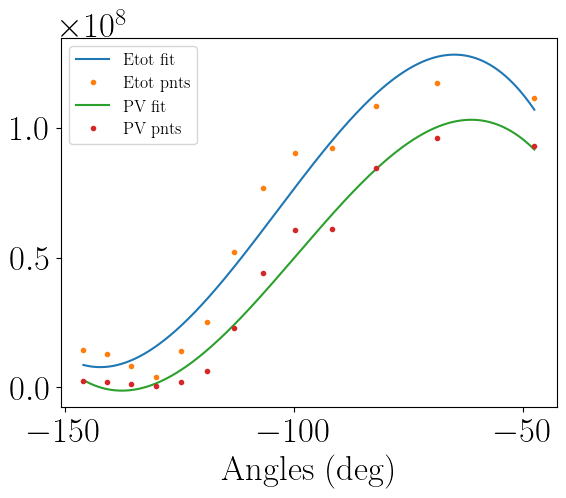

88140202.39472646
221
Ez angle:  85.84535039448396  degrees
128203128.5386352
410
Etot angle:  65.11444590085175  degrees
103100085.60012919
429
PV mag angle:  61.37048144315362  degrees


NameError: name 'poly4S' is not defined

In [29]:
# Let's get the actual angle
minpntz = 4
maxpntz = len(Fys)-3
minpntt = 4
maxpntt = len(Fys)-4
minpntp = 4
maxpntp = len(Fys)-4
minpnts = 0 # 9
maxpnts = len(Fys)-0 # 3


print(Smags,pvtotm)

adegsz = [i*180/np.pi for i in arads]
adegst = [i*180/np.pi for i in arads]
adegsp = [i*180/np.pi for i in arads]

poly4z = np.polyfit(adegsz[minpntz:maxpntz],maxs[minpntz:maxpntz],4)
poly4tot = np.polyfit(adegst[minpntt:maxpntt],maxstot[minpntt:maxpntt],3)
poly4pv = np.polyfit(adegsp[minpntp:maxpntp],pvtotm[minpntp:maxpntp],3)
#poly4S = np.polyfit(Sangs[minpnts:maxpnts],Smags[minpnts:maxpnts],4)

#xss = np.linspace(min(adegs),max(adegs),500)
xssz = np.linspace(min(adegsz[minpntz:maxpntz]),max(adegsz[minpntz:maxpntz]),500)
xsst = np.linspace(min(adegst[minpntt:maxpntt]),max(adegst[minpntt:maxpntt]),500)
xssp = np.linspace(min(adegsp[minpntp:maxpntp]),max(adegsp[minpntp:maxpntp]),500)
#xsss = np.linspace(min(Sangs[minpnts:maxpnts]),max(Sangs[minpnts:maxpnts]),500)

#plt.plot(xssz,np.polyval(poly4z,xssz),'.',label='Ez fit')
#plt.plot(adegsz[minpntz:maxpntz],maxs[minpntz:maxpntz],label='Ez pnts')
plt.plot(xsst,np.polyval(poly4tot,xsst),'-',label='Etot fit')
plt.plot(adegst[minpntt:maxpntt],maxstot[minpntt:maxpntt],'.',label='Etot pnts')
plt.plot(xssp,np.polyval(poly4pv,xssp),'-',label='PV fit')
plt.plot(adegsp[minpntp:maxpntp],pvtotm[minpntp:maxpntp],'.',label='PV pnts')
#plt.plot(xsss,np.polyval(poly4S,xsss),'.',label='S vector fit')
#plt.plot(Sangs[minpnts:maxpnts],Smags[minpnts:maxpnts],label='S vector points')
#plt.plot(adegsp[minpnts:maxpnts],Smags[minpnts:maxpnts],label='S vector points v probe')
#plt.plot(adegsp[minpnts:maxpnts],Smags[minpnts:maxpnts]-pvtot,label='S vector points v probe')
#plt.xticks(adegs[::2])
plt.xlabel('Angles (deg)')
plt.legend(fontsize=12)
#plt.ylim([-0.2e8,2e8])
plt.show()


# -------------------------------------------------
# let's calculate the angles and dispersion
poly4valsz = np.polyval(poly4z,xssz)
indmaxz = np.argmax(poly4valsz)
print(max(poly4valsz))
print(indmaxz)
print('Ez angle: ',-xssz[indmaxz],' degrees')

poly4valstot = np.polyval(poly4tot,xsst)
indmaxtot = np.argmax(poly4valstot)
print(max(poly4valstot))
print(indmaxtot)
print('Etot angle: ',-xsst[indmaxtot],' degrees')

poly4valspv = np.polyval(poly4pv,xssp)
indmaxpv = np.argmax(poly4valspv)
print(max(poly4valspv))
print(indmaxpv)
print('PV mag angle: ',-xssp[indmaxpv],' degrees')

poly4valss = np.polyval(poly4S,xsss)
indmaxs = np.argmax(poly4valss)
print(max(poly4valss))
print(indmaxs)
print('S fit angle: ',-xsss[indmaxs],' degrees')

indmaxsv = np.argmax(Smags)
print(max(Smags))
print(indmaxsv)
print('S vec antle: ',-Sangs[indmaxsv],' degrees')

# -------------------------------------------------
# get full width half maximum of fit
maxfz = max(poly4valsz)
minfz = min(poly4valsz)
halfhz = (maxfz-minfz)/2 + minfz

maxft = max(poly4valstot)
minft = min(poly4valstot)
halfht = (maxft-minft)/2 + minft

maxfpv = max(poly4valspv)
minfpv = min(poly4valspv)
halfhpv = (maxfpv-minfpv)/2 + minfpv
#print(maxf/1e8)
#print(minf/1e8)
#print(halfh/1e8)

def lin_interp(x, y, i, half):
    return x[i] + (x[i+1] - x[i]) * ((half - y[i]) / (y[i+1] - y[i]))

def half_max_x(x, y):
    # get half max height at which we'll find the FWHM
    half = (max(y)-min(y))/2.0+min(y)
    # get -1,0,1 for if the value is below, equal to, or above 0
    signs = np.sign(np.add(y, -half))
    # if the sign before is equal to the next sign, False; if it's not (switch from -1 ->0 or 1, True
    zero_crossings = (signs[0:-2] != signs[1:-1])
    # get where those exist
    zero_crossings_i = np.where(zero_crossings)[0]
    # get full width at those locations
    return [lin_interp(x, y, zero_crossings_i[0], half),
            lin_interp(x, y, zero_crossings_i[1], half)]

# find the two crossing points
hmxz = half_max_x(xssz,poly4valsz)
#hmxt = half_max_x(xsst,poly4valstot)
hmxpv = half_max_x(xssp,poly4valspv)

# print the answer
fwhmz = hmxz[1] - hmxz[0]
print("FWHM from Ez:{:.9f}".format(fwhmz))

#fwhmt = hmxt[1] - hmxt[0]
#print("FWHM from Etot:{:.9f}".format(fwhmt))

fwhmpv = hmxpv[1] - hmxpv[0]
print("FWHM from PV:{:.9f}".format(fwhmpv))

# figure out rms of signal
#xssstrngth = xss*poly4vals
#squaredsig = poly4vals**2
#squaredsig = xssstrngth**2
#meansig = np.mean(squaredsig)
#rmssig = np.sqrt(meansig)
#print('RMS:{:.3f}'.format(rmssig))


In [ ]:
import numpy as np

fwhms = [62.768342562,62.323803691,61.554457142]
lens = [80,90,100]
deg = fwhms[0]/2
rads = deg*np.pi/180

mmsfl = [27.22,54.45,54.45,81.67]
mmsdi = [25.4,25.4,50.8,76.2]

for i in np.arange(len(fwhms)):
    print('---------------------------------------------')
    print('Structure length: ',str(lens[i]),' mm')
    for j in np.arange(len(mmsfl)):
        print(' ')
        print('Mirror: ',j)
        mirrorEFL = mmsfl[j] # effective focal length
        mirrorsize = mmsdi[j] # mirror diameter in mm

        mirrorarea = np.pi*(mirrorsize/2)**2
        spotarea = np.pi*(mirrorEFL*np.tan(rads))**2

#        print('size at probe points: ',2*7.5*np.tan(rads),' mm')
        print('diameter of spot at mirror: ',2*mirrorEFL*np.tan(rads),' mm')
        print('mirror diameter: ',mirrorsize)
        print('radius difference: ',(2*mirrorEFL*np.tan(rads) - mirrorsize)/2,' mm')
#        print('area difference: ',spotarea - mirrorarea,' mm')
#print('size at 89.28 mm: ',2*89.28*np.tan(rads),' mm')


In [ ]:
import matplotlib.patches as patches

center = (0,0)
mrad = mirrorsize
rrad = 2*mirrorEFL*np.tan(rads)

mcircle = patches.Circle(center, mrad, edgecolor='b',facecolor='b',alpha=0.5)
rcircle = patches.Circle(center, rrad, edgecolor='r',facecolor='r',alpha=0.2)
fig, ax = plt.subplots(1)
ax.add_patch(mcircle)
ax.add_patch(rcircle)
ax.set_xticks([-30,-15,0,15,30])
ax.set_yticks([-30,-15,0,15,30])
ax.set_aspect('equal', adjustable='box') 
ax.set_xlim((-rrad-rrad/10,rrad+rrad/10))
ax.set_ylim((-rrad-rrad/10,rrad+rrad/10))
plt.show()

[92.5513011930825, 93.2499869007349, 94.0726603410411, 94.9990645636042, 96.0063884219053, 97.0698282594369, 98.16319865804441, 99.25957720982589, 100.331967436165, 101.353963530629, 102.300400557563, 103.147974096318, 103.875814073436, 104.46599865311799, 104.903995532301, 105.179019774191, 105.2842993692, 105.217241984296, 104.979498794847, 104.5769238272, 104.019429813128]


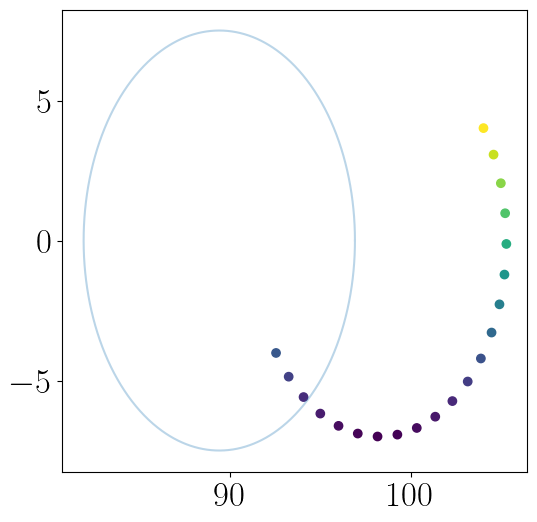

In [39]:
theta = np.linspace(0,2*np.pi,1000)
z = (radius*np.cos(theta)+z_start)*mm
y = radius*np.sin(theta)*mm

print(ztxtlocs)
ytxtlocsa = np.array(ytxtlocs)
ztxtlocsa = np.array(ztxtlocs)
plt.figure(figsize=(6,6))
cmap = plt.get_cmap('viridis')
norm = plt.Normalize(ytxtlocsa.min(),ytxtlocsa.max())
line_colors = cmap(norm(ytxtlocsa))
plt.plot(z,y,alpha=0.3)
plt.scatter(ztxtlocsa,ytxtlocsa,color=line_colors)
plt.show()

Etot for radiation at 60 degrees, cut angle is at:  3.040640164728501
PV for radiation at 60 degrees, cut angle is at:  -21.448015030162395


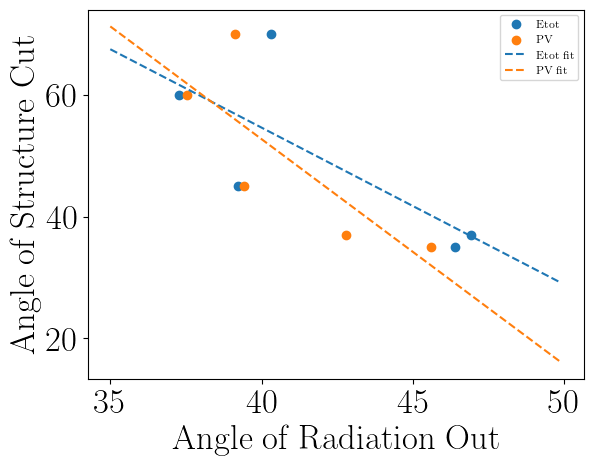

In [40]:
import numpy as np
from scipy.optimize import curve_fit
import  matplotlib.pyplot as plt

ca = [35,37,45,60,70]

raz = [62.96,60.48,50.4,50.64,50.75]
rat = [46.4,46.92,39.22,37.28,40.3]
rap = [45.61,42.79,39.43,37.54,39.11]

low = 0
high = -1

#ca = ca[low:high+1]
#raz = raz[low:high+1]
#rat = rat[low:high+1]
#rap = rap[low:high+1]

def lin(x,A,B):
    return A*x + B

def expon(x,A,B,C,D):
    return A*np.exp(-B*(x+C))+D

xxss = np.arange(35,50,.1)
polyz = np.polyfit(raz,ca,1)
polyt = np.polyfit(rat,ca,1)
polyp = np.polyfit(rap,ca,1)



print('Etot for radiation at 60 degrees, cut angle is at: ',lin(60,polyt[0],polyt[1]))
print('PV for radiation at 60 degrees, cut angle is at: ',lin(60,polyp[0],polyp[1]))

#plt.scatter(raz,ca,label='Ez')
plt.scatter(rat,ca,label='Etot')
plt.scatter(rap,ca,label='PV')
#plt.plot(xxss,np.polyval(polyz,xxss),'--',label='Ez fit')
plt.plot(xxss,np.polyval(polyt,xxss),'--',label='Etot fit')
plt.plot(xxss,np.polyval(polyp,xxss),'--',label='PV fit')
plt.legend(fontsize=8)
plt.xlabel('Angle of Radiation Out')
plt.ylabel('Angle of Structure Cut')
plt.show()

[-0.71696762 80.15026034]
for radiation at 60 degrees, cut angle is at:  26.377688965767987


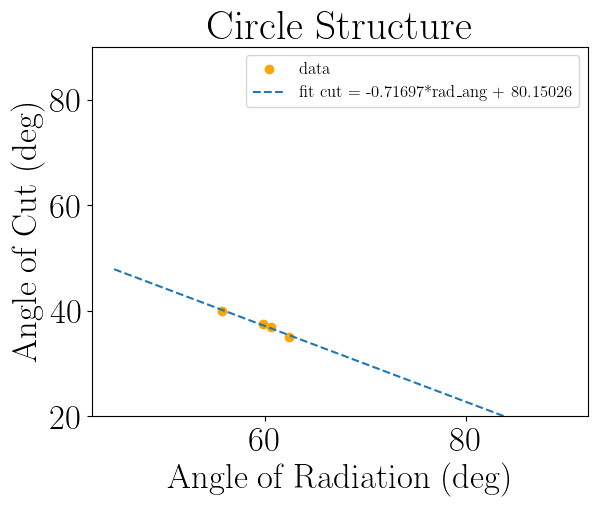

In [41]:
import numpy as np
from scipy.optimize import curve_fit
import  matplotlib.pyplot as plt

cutang = [30,35,40,45,50,60,70,80]
radang = [62.455055888056831,62.77754718662299,55.75006645424193,53.11546895959317 , 52.53636243352542,50.722844073885994,50.941127704193605,54.543709708662874]

cutang = [35,37,37.5,40]
radang = [62.45505588805683,60.621121048641115, 59.819180730453525,55.75006645424193]

#cutang = cutang[:-2]
#radang = radang[:-2]

def lin(x,A,B):
    return A*x + B

def expon(x,A,B,C,D):
    return A*np.exp(-B*(x+C))+D

est = [40,0.1,-47,25]

cxss = np.arange(45,90,.1)
cpoly1 = np.polyfit(radang,cutang,1)

#popt, pcov = curve_fit(expon, radang, cutang,p0=est)

print(cpoly1)
#print(popt)
print('for radiation at 60 degrees, cut angle is at: ',lin(75,cpoly1[0],cpoly1[1]))
plt.scatter(radang,cutang,color='orange',label='data')
plt.plot(cxss,np.polyval(cpoly1,cxss),'--',label='fit cut = '+str(round(cpoly1[0],5))+'*rad_ang + '+str(round(cpoly1[1],5)))
#plt.plot(cxss,expon(cxss,40,0.1,-47,25),'--',label='expo test')
#plt.plot(cxss,expon(cxss,popt[0],popt[1],popt[2],popt[3]),'--',label='expo fit')
plt.ylim([20,90])
plt.legend(fontsize=12)
plt.xlabel('Angle of Radiation (deg)')
plt.ylabel('Angle of Cut (deg)')
plt.title('Circle Structure')
plt.show()


[0.67590794 5.39404764]


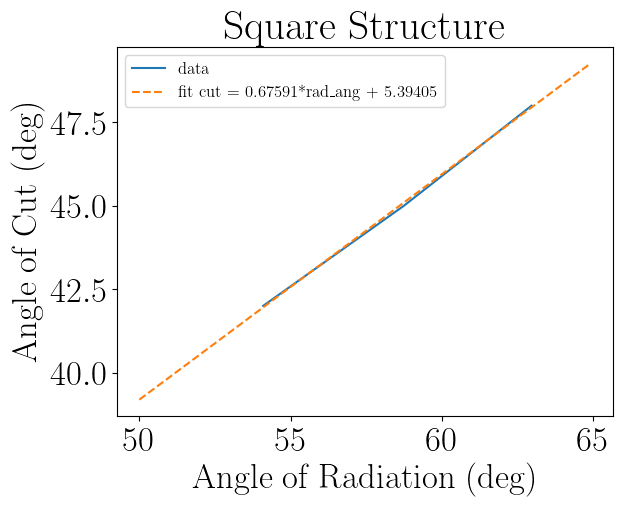

In [42]:
import numpy as np
import  matplotlib.pyplot as plt

cutang = [42,45,48]
radang = [54.09, 58.74, 62.96]

def lin(x,A,B):
    return A*x + B

sxss = np.arange(50,65,.1)
spoly1 = np.polyfit(radang,cutang,1)

print(spoly1)
plt.plot(radang,cutang,label='data')
plt.plot(sxss,np.polyval(spoly1,sxss),'--',label='fit cut = '+str(round(spoly1[0],5))+'*rad_ang + '+str(round(spoly1[1],5)))
plt.legend(fontsize=12)
plt.xlabel('Angle of Radiation (deg)')
plt.ylabel('Angle of Cut (deg)')
plt.title('Square Structure')
plt.show()


NameError: name 'Xsse' is not defined

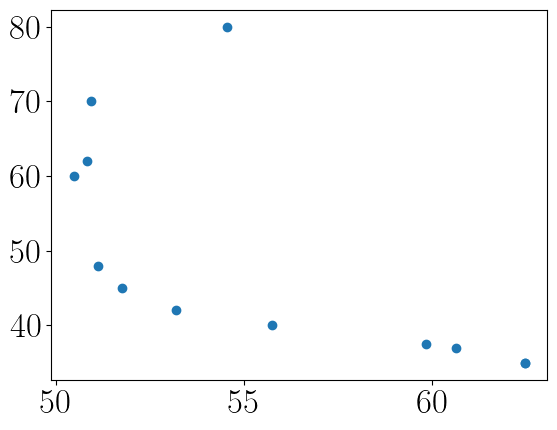

In [43]:
import numpy as np
import  matplotlib.pyplot as plt
from sklearn.preprocessing import FunctionTransformer
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

ccutang = np.array([35,42,45,48,60,62,35,40,70,80,37,37.5])
cradang = np.array([62.45505588805683,53.199, 51.77, 51.13,50.4854583389398,50.83661711513542,62.45505588805683,55.75006645424193,50.941127704193605,54.543709708662874,60.621121048641115, 59.819180730453525])
scutang = [42,45,48,62]
sradang = [72.52071507178314, 71.49657527481159, 71.73731998316785,72.93347174644414]

def features(X):
    return np.stack([X[:,0]**2,X[:,0]*X[:,1],X[:,1]**2,X[:,0],X[:,1]]).T

model = Pipeline([("transformer",FunctionTransformer(features)),("regressor",LinearRegression(fit_intercept=False))])
#model.fit(np.stack([cradang,ccutang]).T,b)
#w = model["regressor"].coef_
#Z = w[0]*Xsse**2 + w[1]*Xsse*Ysse+w[2]*Ysse**2 + w[3]*Xsse+w[4]*Ysse

xxss = np.arange(50,68,.1)

cpoly = np.polyfit(cradang[1:-2],ccutang[1:-2],1)
spoly = np.polyfit(sradang,scutang,1)

plt.scatter(cradang,ccutang)
#plt.scatter(sradang,scutang)
#plt.plot(xxss,np.polyval(cpoly,xxss),label='Circle cut = '+str(round(cpoly[0],5))+'*rad_ang + '+str(round(cpoly[1],5)))
#plt.plot(xxss,np.polyval(spoly,xxss),'--',label='Square cut = '+str(round(spoly[0],5))+'*rad_ang + '+str(round(spoly[1],5)))
#plt.legend(fontsize=10)
plt.contour(Xsse,Ysse,Z,[1])
plt.xlabel('Angle of radiation (deg)')
plt.ylabel('Angle of cut (deg)')
plt.show()

In [ ]:
#ccutang = np.array([35,37,37.5,40])
#cradang = np.array([62.45505588805683,60.621121048641115, 59.819180730453525,55.75006645424193])

Xe = cradang
Ye = ccutang
A = np.stack([Xe**2,Xe*Ye,Ye**2,Xe,Ye]).T
b = np.ones_like(Xe)
w = np.linalg.lstsq(A,b, rcond=None)[0].squeeze()

xlin = np.linspace(45,75,300)
ylin = np.linspace(20,90,300)
Xsse,Ysse = np.meshgrid(xlin,ylin)

Z = w[0]*Xsse**2 + w[1]*Xsse*Ysse+w[2]*Ysse**2 + w[3]*Xsse+w[4]*Ysse
plt.scatter(cradang,ccutang)
#plt.scatter(sradang,scutang)
#plt.plot(xxss,np.polyval(cpoly,xxss),label='Circle cut = '+str(round(cpoly[0],5))+'*rad_ang + '+str(round(cpoly[1],5)))
#plt.plot(xxss,np.polyval(spoly,xxss),'--',label='Square cut = '+str(round(spoly[0],5))+'*rad_ang + '+str(round(spoly[1],5)))
#plt.legend(fontsize=10)
#plt.contour(Xsse,Ysse,Z,[1])
plt.xlabel('Angle of radiation (deg)')
plt.ylabel('Angle of cut (deg)')
plt.show()

Radiation angle:  40  deg
Square cut angle:  32.43036531033512  deg
Radiation angle from circle:  40.0  deg
Circle cut angle:  45.67899923435997  deg
16.894399988070802 -5.785088487178854


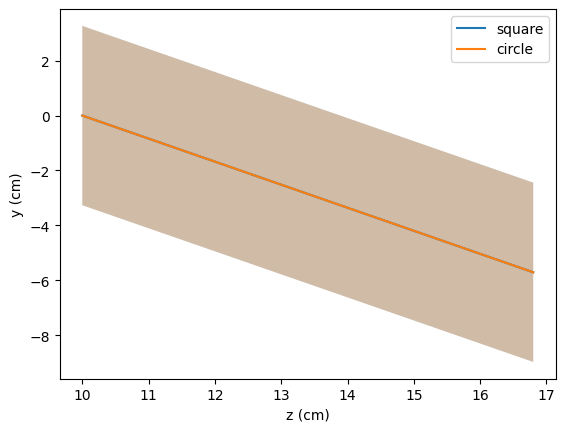

In [12]:
# Need to be a little clearer with this... Let's go by cm
# Let's say the mirror is at an angle of 50 degrees wrt straight forward and 9 cm away from the end
radiation = 40

# Get the square cut angle from the radiation out
scutangle = np.polyval(spoly,radiation)

# From the square's cut angle, put that into the circle and get the radiation out angle for the circle
ccutangle = np.polyval(cpoly,radiation)
cradangle = (ccutangle - cpoly[1])/cpoly[0] # change between s and c for cut angle

print('Radiation angle: ',str(radiation),' deg')
print('Square cut angle: ',str(scutangle),' deg')
print('Radiation angle from circle: ',str(cradangle),' deg')
print('Circle cut angle: ',str(ccutangle),' deg')


lenaway = 9 # cm
starty = 0
startz = 10 # cm
endz = lenaway*np.cos(-radiation*np.pi/180)+startz
endy = lenaway*np.sin(-radiation*np.pi/180)
print(endz,endy)

sslope = np.sin(radiation*np.pi/180)/np.cos(radiation*np.pi/180)
cslope = np.sin(cradangle*np.pi/180)/np.cos(cradangle*np.pi/180)
syint = sslope*startz
cyint = cslope*startz

linethickness = 2.5 # cm
cvertrange = linethickness/np.cos(-cradangle*np.pi/180)
svertrange = linethickness/np.cos(-radiation*np.pi/180)


zzs = np.arange(10,endz,.1)
sline = np.polyval([-sslope,syint],zzs)
slow = [i - svertrange for i in sline]
shigh = [i + svertrange for i in sline]

cline = np.polyval([-cslope,cyint],zzs)
clow = [i - cvertrange for i in cline]
chigh = [i + cvertrange for i in cline]

plt.plot(zzs,sline,label='square')
plt.fill_between(zzs,slow,shigh,alpha=0.3)
plt.plot(zzs,cline,label='circle')
plt.fill_between(zzs,clow,chigh,alpha=0.3)
plt.legend(fontsize=10)
plt.xlabel('z (cm)')
plt.ylabel('y (cm)')
plt.show()



In [15]:
# Need to be a little clearer with this... Let's go by cm
# Let's say the mirror is at an angle of 50 degrees wrt straight forward and 9 cm away from the end
radiation = np.arange(30,61,1)


for i in np.arange(len(radiation)):
    # Get the square cut angle from the radiation out
    scutangle = np.polyval(spoly,radiation[i])

    # From the square's cut angle, put that into the circle and get the radiation out angle for the circle
    ccutangle = np.polyval(cpoly,radiation[i])
    cradangle = (ccutangle - cpoly[1])/cpoly[0] # change between s and c for cut angle

    print('Radiation angle: ',str(radiation[i]),' deg')
    print('Square cut angle: ',str(scutangle),' deg')
    #print('Radiation angle from circle: ',str(cradangle),' deg')
    print('Circle cut angle: ',str(ccutangle),' deg')

Radiation angle:  30  deg
Square cut angle:  25.671285893057004  deg
Circle cut angle:  37.084072217145426  deg
Radiation angle:  31  deg
Square cut angle:  26.347193834784818  deg
Circle cut angle:  37.94356491886688  deg
Radiation angle:  32  deg
Square cut angle:  27.02310177651263  deg
Circle cut angle:  38.80305762058833  deg
Radiation angle:  33  deg
Square cut angle:  27.69900971824044  deg
Circle cut angle:  39.66255032230979  deg
Radiation angle:  34  deg
Square cut angle:  28.374917659968254  deg
Circle cut angle:  40.52204302403124  deg
Radiation angle:  35  deg
Square cut angle:  29.050825601696065  deg
Circle cut angle:  41.3815357257527  deg
Radiation angle:  36  deg
Square cut angle:  29.726733543423876  deg
Circle cut angle:  42.24102842747415  deg
Radiation angle:  37  deg
Square cut angle:  30.40264148515169  deg
Circle cut angle:  43.100521129195606  deg
Radiation angle:  38  deg
Square cut angle:  31.0785494268795  deg
Circle cut angle:  43.96001383091706  deg
Radia

[-90.0, -81.0000000000005, -71.99999999999714, -62.99999999999952, -54.0000000000013, -44.99999999999972, -35.999999999998245, -27.000000000000888, -18.000000000000774, -9.000000000000247, 0.0, 9.000000000000247]
[array([      0.        ,       0.        ,       0.        , ...,
       3631191.58112015, 3379213.51290731, 2935453.12353774]), array([      0.        ,       0.        ,       0.        , ...,
       6153669.19922653, 5265441.66998898, 4185754.70105889]), array([       0.        ,        0.        ,        0.        , ...,
       10627136.8619006 ,  8984502.69994625,  6984447.21672096]), array([       0.       ,        0.       ,        0.       , ...,
       17176384.0375873, 15318568.9023982, 12524558.2173085]), array([       0.       ,        0.       ,        0.       , ...,
       20817960.6576088, 20437598.9869815, 18451580.5970378]), array([       0.       ,        0.       ,        0.       , ...,
       16103357.7006696, 17294404.3896888, 17139108.2186434]), array(

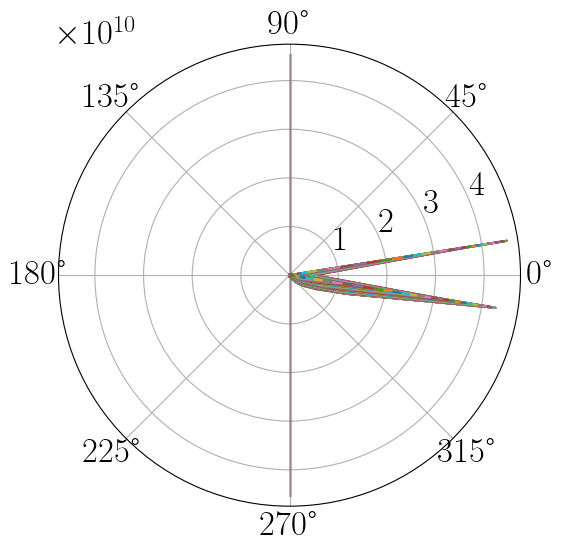

In [21]:
# plot on weird circle
maxs = PVtxt


print(angles)
print(maxs)
arads = [i*np.pi/180 for i in angles]
fig,ax = plt.subplots(subplot_kw={'projection':'polar'},figsize=(6,6))
ax.plot(arads[:len(Fys)],maxs)
ax.plot(np.array([dangle+180,dangle])*np.pi/180,[np.max(maxs),np.max(maxs)],linewidth=2,alpha=0.5,linestyle='-',label='surface')
ax.grid(True)
plt.show()

In [30]:
import  matplotlib.pyplot as plt
import numpy as np
from scipy.fft import fft, fftfreq
import os
import shutil
import scipy as sp
import scipy.constants as sc
import sys
from matplotlib import gridspec
from matplotlib import rc
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.colors import SymLogNorm
from matplotlib.colors import LogNorm
from scipy.optimize import curve_fit


from openpmd_viewer import OpenPMDTimeSeries
from openpmd_viewer.addons import LpaDiagnostics



FontSize=25
FontSizeLabelAxis=25
rc('legend',fontsize=FontSize)
rc('xtick',labelsize=FontSize)
rc('ytick',labelsize=FontSize)
font = {'family' : 'normal',
        'size'   : FontSize}

rc('font', **font)
rc('text', usetex=True)


# scaling factors
mm=1e3
MV=1e-6
kV=1e-3

cms = sp.constants.speed_of_light

time = 3.36678*10**-11
zloc = time*cms
print(zloc)

0.010093352517452399


In [31]:
base = '/lstr/sahara/aard/cphillips/'

direc = '1nC/1beam/3warpx/circ/32901_cond90/' # ts 3
direc = '1nC/1beam/3warpx/circ/34216_cond35/'
direc = '1nC/1beam/3warpx/circ/37792_cond25len10/'


if direc[4] == '2':
    print('two bunch')
    txtfile = base+direc+'diags/reducedfiles/reduced_diags_drive.txt' # _drive
    spec = 'drive'
else:
    print('one bunch')
    txtfile = base+direc+'diags/reducedfiles/reduced_diags.txt' # _drive
    spec = 'myparticle'

probetxtfile = base+direc+'diags/reducedfiles/probe.txt' # exitprobe

filedir = '/lstr/sahara/aard/cphillips/'+direc+'diags/slabmovingwarpx/'
ts = LpaDiagnostics(filedir)

N_iterations = len(ts.iterations)
print(N_iterations)

Nitera = 1

if Nitera==-1:
   it = ts.iterations[N_iterations-1]
else:
   it = ts.iterations[Nitera]

one bunch
6


In [32]:



# -------------------------------------------------------------------------
# retrieve the data from the hdf5 file for the electric and magnetic fields
# -------------------------------------------------------------------------
Ez, info_Ez = ts.get_field( iteration=it,  field='E', coord='z',
                            slicing_dir='x', plot=False)
Ex, info_Ex = ts.get_field( iteration=it,  field='E', coord='x',
                            slicing_dir='x', plot=False)
Ey, info_Ey = ts.get_field( iteration=it,  field='E', coord='y',
                            slicing_dir='x', plot=False)
Bx, info_Bx = ts.get_field( iteration=it,  field='B', coord='x',
                            slicing_dir='x', plot=False)
By, info_By = ts.get_field( iteration=it,  field='B', coord='y',
                            slicing_dir='x', plot=False)

xf, yf, zf, px, py, pz = ts.get_particle( ['x','y','z','ux','uy','uz'],  species=spec, iteration=it) # ******************************************** myparticle


print('Num Particles: ',len(xf),len(yf),len(zf),len(px),len(py),len(pz))
shapeEz= np.shape(Ez)

print('z, y, x grid size: ',shapeEz)

absmax=MV*max(np.max(np.max(np.abs(Ez))),np.abs(np.min(np.min(np.abs(Ez)))))

xsc=np.linspace(info_Ez.xmin*1e3, info_Ez.xmax*1e3, shapeEz[2])
ysc=np.linspace(info_Ez.ymin*1e3, info_Ez.ymax*1e3, shapeEz[1])
zsc=np.linspace(info_Ez.zmin*1e3, info_Ez.zmax*1e3, shapeEz[0])

# Are there particles that should be "lost"?
print('boundary in x is [-2,2]')
print('boundary in y is [-1,1]')
print('xmax: ',max(xf),' xmin: ',min(xf))
print('ymax: ',max(yf),' ymin: ',min(yf))
n = 0
zf = zf[n:]
xf = xf[n:]
yf = yf[n:]
px = px[n:]
py = py[n:]
pz = pz[n:]
print('zmax: ',max(zf),' zmin: ',min(zf))
print('xmean: ',np.mean(xf))
print('ymean: ',np.mean(yf))
print('zmean: ',np.mean(zf))
print('xp: ',np.mean(px))
print('yp: ',np.mean(py))
print('zp: ',np.mean(pz))

print('Domain:')
print('zmin/max: ',info_Ez.zmin*mm, info_Ez.zmax*mm)
print('ymin/max: ',info_Ez.ymin*mm, info_Ez.ymax*mm)


print('Num Particles: ',len(xf),len(yf),len(zf),len(px),len(py),len(pz))
xfin = [x for x in xf if x<=2e-3 and x>=-2e-3]
print(len(xfin))
yfin = [y for y in yf if y<=1e-3 and y>=-1e-3]
print(len(yfin))


Num Particles:  30000 30000 30000 30000 30000 30000
z, y, x grid size:  (2048, 256, 64)
boundary in x is [-2,2]
boundary in y is [-1,1]
xmax:  0.00040538557522871614  xmin:  -0.0004096579904569141
ymax:  0.0005683637608458971  ymin:  -0.0005526147980082676
zmax:  0.10177739019868394  zmin:  0.09774358245984717
xmean:  8.116645068216114e-08
ymean:  6.352238141072719e-08
zmean:  0.09973726345887125
xp:  0.0001689082604704988
yp:  0.002095702557883952
zp:  97.43555388046606
Domain:
zmin/max:  -28.597254014046165 158.03049505284952
ymin/max:  -10.59541015625 9.595410156250002
Num Particles:  30000 30000 30000 30000 30000 30000
30000
30000


In [33]:
# Getting the ranges we want for plotting in x, y, and z 
xlow = -1.55
xhigh = 1.55
xlow = info_Ez.xmin*mm # 60 50
xhigh = info_Ez.xmax*mm # 80
lenx = xhigh-xlow
xticklist = np.arange(xlow,xhigh+lenx/2,lenx/4)
xticklist = [round(i,1) for i in xticklist]
xindexmin = (np.abs(xsc - xlow)).argmin()
xindexmax = (np.abs(xsc - xhigh)).argmin()
print('x desired: ', xlow, xhigh, ' mm')
print('x acheived: ', xsc[xindexmin],xsc[xindexmax], ' mm')
print('xindexmin: ',xindexmin,' xindexmax: ',xindexmax)

# where is the slice for x=0?
xindex0 = (np.abs(xsc - 0)).argmin()
print('x = 0 acheived: ',xsc[xindex0], ' mm')
xindex0 = xindex0-xindexmin

ylow = -8
yhigh = 6
#ylow = info_Ez.ymin*mm # 60 50
#yhigh = info_Ez.ymax*mm # 80
leny = yhigh-ylow
yticklist = np.arange(ylow,yhigh+leny/2,leny/4)
yticklist = [round(i,1) for i in yticklist]
yindexmin = (np.abs(ysc - ylow)).argmin()
yindexmax = (np.abs(ysc - yhigh)).argmin()
print('y desired: ', ylow, yhigh, ' mm')
print('y acheived: ', ysc[yindexmin],ysc[yindexmax], ' mm')
print('y indexmin: ',yindexmin,' y indexmax: ',yindexmax)

# where is the slice for y=0?
yindex0 = (np.abs(ysc - 0)).argmin()
print('y = 0 acheived: ',ysc[yindex0], ' mm')
print('y = 0 index: ',yindex0)


wavelength = 4.04/mm
dist = wavelength*1.5
print(np.mean(zf),dist)
#zlow = (np.mean(zf) - dist)*mm

ysize = yhigh - ylow

zlow = 91
zhigh = 111
#zlow = 26.45
#zhigh = 33
#zlow = info_Ez.zmin*mm
#zhigh = info_Ez.zmax*mm
lenz = zhigh-zlow-2
zticklist = np.arange(zlow+1,zhigh-1+lenz/2,lenz/4)
zticklist = [round(i,1) for i in zticklist]
print(zticklist)
zindexmin = (np.abs(zsc - zlow)).argmin()
zindexmax = (np.abs(zsc - zhigh)).argmin()
if zindexmin == 0:
    zindexmax = zindexmax-1
print('z desired: ', zlow, zhigh, ' mm')
print('z acheived: ', zsc[zindexmin],zsc[zindexmax], ' mm')
print('z indexmin: ',zindexmin,' z indexmax: ',zindexmax)

mult = 1


x desired:  -2.5938281250000004 2.5938281250000004  mm
x acheived:  -2.5938281250000004 2.5938281250000004  mm
xindexmin:  0  xindexmax:  63
x = 0 acheived:  0.04117187499999986  mm
y desired:  -8 6  mm
y acheived:  -7.98248046875 6.032324218750002  mm
y indexmin:  33  y indexmax:  210
y = 0 acheived:  0.014667968750000426  mm
y = 0 index:  134
0.09973726345887125 0.00606
[92.0, 96.5, 101.0, 105.5, 110.0, 114.5]
z desired:  91 111  mm
z acheived:  91.01955437665592 110.98607955772584  mm
z indexmin:  1312  z indexmax:  1531


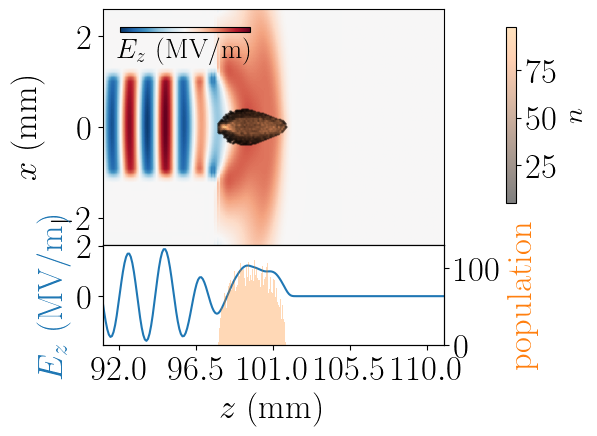

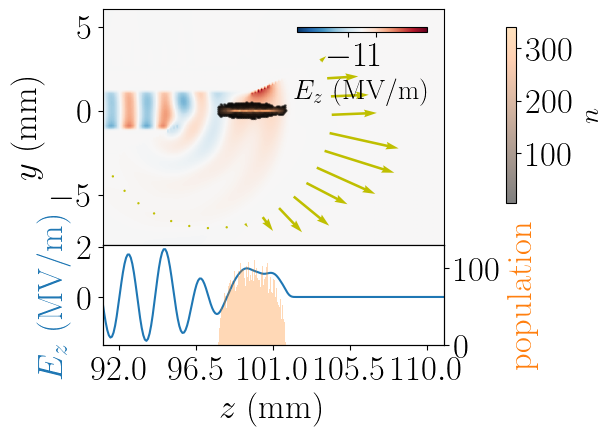

In [34]:
params = {"ytick.color" : "k",
          "xtick.color" : "k",
          "axes.labelcolor" : "k",
          "axes.edgecolor" : "k"}
plt.rcParams.update(params)

# generate a plot of the Ez wake in (z,y) with lineout of Ez
fig=plt.figure(9999)
gs1 = gridspec.GridSpec(11, 13)
ax1 = fig.add_subplot(gs1[0:7,1:10])
ax2 = fig.add_subplot(gs1[7:10,1:10], sharex =ax1)
ax3 = fig.add_subplot(gs1[0:7,11:12])



# record Ez in the (z,x) plane for y=0
yEzslice=Ez[zindexmin:zindexmax,yindex0,xindexmin:xindexmax].transpose()*MV # gets the y=0 slice
yEzslice = np.flipud(yEzslice)
shapeyEzslice = np.shape(yEzslice)

yEabsmax = max(np.max(np.max(np.abs(yEzslice))),np.abs(np.min(np.min(np.abs(yEzslice)))))

# plot slice (upper plot with red and blue lines)
imField=ax1.imshow(yEzslice,extent=[zsc[zindexmin],zsc[zindexmax], xsc[xindexmin],xsc[xindexmax]],
                   cmap='RdBu_r', vmin=-yEabsmax/mult, vmax=yEabsmax/mult, aspect='auto')
cbaxes = inset_axes(ax1, width="38%", height="2%", loc=2)
cbar1  = fig.colorbar(imField, cax=cbaxes, orientation='horizontal',ticks=[-2,2]).set_label(label=r'$E_z$ (MV/m)',size=20)
ax1.set_ylabel(r'$x$ (mm)', fontsize=FontSizeLabelAxis)


# record particle and plot a histogram on top of 3d of Ez - NEED TO ADJUST AXES FOR THIS
particles=ax1.hexbin(zf*mm, xf*mm, gridsize=200,extent=[zsc[zindexmin],zsc[zindexmax], xsc[xindexmin],xsc[xindexmax]], cmap='copper', alpha=0.5,  mincnt=5)
ax3.axis('off')
cbaxes2 = inset_axes(ax3, width="30%", height="75%", loc=2)
cbar2 = fig.colorbar(particles, cax=cbaxes2).set_label(label=r'$n$ ',size=20)

# Line plot of Ez plus histogram of the population on lower plot
zsca=np.linspace(zsc[zindexmin],zsc[zindexmax], zindexmax-zindexmin)
ax2.plot (zsca,yEzslice[xindex0,:]) # gets the x=0 slice
ax2.set_xlabel(r'$z$ (mm)', fontsize=FontSizeLabelAxis)
ax2.set_ylabel(r'$E_z$ (MV/m) ', fontsize=FontSizeLabelAxis, color="C0")
ax2.set_xticks(zticklist)
ax22 = ax2.twinx()
ax22.hist(zf*mm,shapeEz[0], range=(zsc[zindexmin],zsc[zindexmax]),alpha=0.3, color='C1')
ax22.set_ylabel(r'population', fontsize=FontSizeLabelAxis, color="C1")

# Set up the plots
plt.setp(ax1.get_xticklabels(), visible=False)
# remove last tick label for the second subplot
yticks = ax2.yaxis.get_major_ticks()
yticks[-1].label1.set_visible(False)
# remove vertical gap between subplots
plt.subplots_adjust(hspace=.0)
#plt.subplots_adjust(hspace=.0)

# Save the plot to be viewed
#plt.savefig(save_dir+fig9999)
#plt.savefig(save_dir+fig9999p,dpi=600)
#plt.savefig(plotnms[pn]+'x.png')
#plt.tight_layout()
#plt.savefig('/lstr/sahara/aard/cphillips/ipynbfiles/AAC24/paper/1bunchWXEx.png')
plt.show()



#-------------------------------------------------------------------------
# record Ez in the (z,y) plane for x=0
fig=plt.figure(9998)
gs1 = gridspec.GridSpec(11, 13)
ax1 = fig.add_subplot(gs1[0:7,1:10])
ax2 = fig.add_subplot(gs1[7:10,1:10], sharex =ax1)
ax3 = fig.add_subplot(gs1[0:7,11:12])

# record Ez in the (z,y) plane for x=0
xEzslice=Ez[zindexmin:zindexmax,yindexmin:yindexmax,xindex0].transpose()*MV # gets the x=0 sliceplt.gca().invert_yaxis()
xEzslice = np.flipud(xEzslice)
shapexEzslice = np.shape(xEzslice)
xEabsmax = max(np.max(np.max(np.abs(xEzslice))),np.abs(np.min(np.min(np.abs(xEzslice)))))

# plot slice (upper plot with red and blue lines)
imField=ax1.imshow(xEzslice,extent=[zsc[zindexmin],zsc[zindexmax], ysc[yindexmin],ysc[yindexmax]],
                   cmap='RdBu_r', vmin=-xEabsmax/mult, vmax=xEabsmax/mult, aspect='auto')
cbaxes = inset_axes(ax1, width="38%", height="2%", loc=1)
cbar1  = fig.colorbar(imField, cax=cbaxes, orientation='horizontal',ticks=[-1,1]).set_label(label=r'$E_z$ (MV/m)',size=20)
ax1.set_ylabel(r'$y$ (mm)', fontsize=FontSizeLabelAxis)
plt.gca().invert_yaxis()

# record particle and plot a histogram on top of 3d of Ez
particles=ax1.hexbin(zf*mm, yf*mm, gridsize=200,extent=[zsc[zindexmin],zsc[zindexmax], ysc[yindexmin],ysc[yindexmax]], cmap='copper', alpha=0.5,  mincnt=5)
ax3.axis('off')
cbaxes2 = inset_axes(ax3, width="30%", height="75%", loc=2)
cbar2 = fig.colorbar(particles, cax=cbaxes2).set_label(label=r'$n$ ',size=20)

# include the points that are measured
#ax1.scatter(ztxtlocs,ytxtlocs,c='y')
ax1.quiver(ztxtlocs,ytxtlocs,Szavg,Syavg,color='y',scale=1500000000)





# Line plot of Ez plus histogram of the population on lower plot
zscb=np.linspace(zsc[zindexmin],zsc[zindexmax], zindexmax-zindexmin)
nyindex0 = yindex0-yindexmin
ax2.plot (zscb,xEzslice[shapexEzslice[0]-nyindex0,:]) # Ez slice has shape (ylen,zlen)
#ax2.plot (zscb,Ey[16,48,:]*1e-6)
#ax2.plot (zscb,Ex[16,48,:]*1e-6)
ax2.set_xlabel(r'$z$ (mm)', fontsize=FontSizeLabelAxis)
ax2.set_ylabel(r'$E_z$ (MV/m) ', fontsize=FontSizeLabelAxis, color="C0")
ax2.set_xticks(zticklist)
ax22 = ax2.twinx()
ax22.hist(zf*mm,shapeEz[0], range=(zsc[zindexmin],zsc[zindexmax]),alpha=0.3, color='C1')
ax22.set_ylabel(r'population', fontsize=FontSizeLabelAxis, color="C1")

# Set up the plots
plt.setp(ax1.get_xticklabels(), visible=False)
# remove last tick label for the second subplot
yticks = ax2.yaxis.get_major_ticks()
yticks[-1].label1.set_visible(False)
# remove vertical gap between subplots
plt.subplots_adjust(hspace=.0)
#plt.subplots_adjust(hspace=.0)

# Save the plot to be viewed
#plt.savefig(save_dir+fig9998)
#plt.savefig(save_dir+fig9998p,dpi=600)
#plt.savefig(plotnms[pn]+'y.png')
#plt.tight_layout()
#plt.savefig('/lstr/sahara/aard/cphillips/ipynbfiles/AAC24/paper/1bunchWXEyerika.png')
plt.show()



In [39]:
probevector = [[ztxtlocs[i],ytxtlocs[i]] for i in np.arange(len(ztxtlocs))]
Svector = [[Szavg[i],Syavg[i]] for i in np.arange(len(Szavg))]

for i in np.arange(len(Szavg)):
    print(np.dot(Svector[i],probevector[i]))

-400913811.1348877
-429053216.4539078
-412766324.36806256
-260957698.25243485
-120613326.51955715
-35624955.90430768
-9512350.341479912
9942212.435344275
704606194.9020057
2454924121.375772
6268631226.34171
15388372737.150694
27915074234.006065
40242616027.54563
40564923820.53082
26193917356.467144
16486972738.26862
12715428143.50407
8558860106.073422
4169283361.5498915
1425627067.2006574


In [31]:
# testing integrate
import numpy as np
import scipy
from scipy.integrate import cumtrapz

x = np.array([-1, 0, 1, 2, 3, 4, 5])
y = np.array([0, 1, 2, 3, 4, 5, 6])

cuminteg = cumtrapz(y, x, initial=0)
print(cuminteg)

definteg = np.trapz(y,x)
print(definteg)
print(np.trapz(y,x))

print(scipy.integrate.cumulative_trapezoid(y,x))


[ 0.   0.5  2.   4.5  8.  12.5 18. ]
18.0
18.0
[ 0.5  2.   4.5  8.  12.5 18. ]


/tmp/ipykernel_3856653/3691066905.py:9: DeprecationWarning: 'scipy.integrate.cumtrapz' is deprecated in favour of 'scipy.integrate.cumulative_trapezoid' and will be removed in SciPy 1.14.0
  cuminteg = cumtrapz(y, x, initial=0)
